# Auto Import test

In [1]:
import requests
import pandas as pd
from datetime import datetime


from pprint import pprint
from io import BytesIO

## Gran Data

In [2]:
gran_data = requests.get('https://dub.sh/ds-data-granular')
gran_data_df = pd.read_parquet((BytesIO(gran_data.content)))
# gran_data_df.to_csv(f'./data/granular_data.csv', index=False)

In [3]:
gran_data_df.info()
copy_gran_df = gran_data_df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6254937 entries, 0 to 6254936
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   donor_id    object
 1   visit_date  object
 2   birth_date  int64 
dtypes: int64(1), object(2)
memory usage: 143.2+ MB


In [4]:
gran_data_df.sample(5).head()

,donor_id,visit_date,birth_date
4598195,06ntH,2012-11-25,1978
2667548,030cu,2021-01-18,1983
137459,008Na,2016-11-30,1978
5721269,08WcY,2023-02-25,1989
3317234,03TcP,2014-09-21,1974


In [5]:
print(gran_data_df.describe())

         birth_date
count  6.254937e+06
mean   1.984377e+03
std    1.075378e+01
min    1.899000e+03
25%    1.977000e+03
50%    1.986000e+03
75%    1.993000e+03
max    2.024000e+03


In [6]:
print(gran_data_df.isna().sum())

donor_id      0
visit_date    0
birth_date    0
dtype: int64


Axes(0.125,0.11;0.775x0.77)


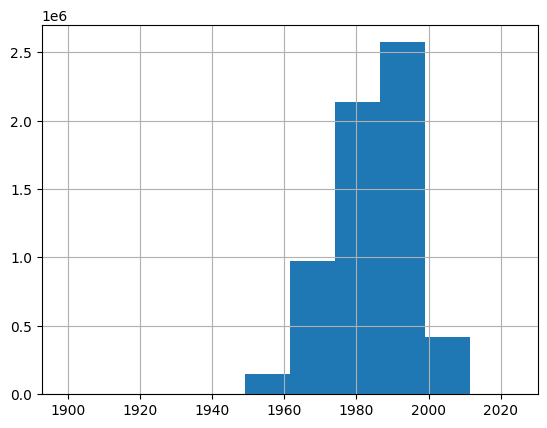

In [7]:
print(gran_data_df['birth_date'].hist())

In [23]:
copy_gran_df['visit_date'] = pd.to_datetime(gran_data_df['visit_date'])


In [9]:
copy_gran_df['current_age'] = datetime.now().year - copy_gran_df['birth_date']
copy_gran_df['visit_age'] = pd.to_datetime(copy_gran_df['visit_date']).dt.year - copy_gran_df['birth_date']
copy_gran_df['visit_date'] = pd.to_datetime(copy_gran_df['visit_date']).dt.year 
copy_gran_df


,donor_id,visit_date,birth_date,current_age,visit_age
0,00000,2013,1964,60,49
1,00000,2014,1964,60,50
2,00000,2015,1964,60,51
3,00000,2015,1964,60,51
4,00000,2016,1964,60,52
...,...,...,...,...,...
6254932,00Ti4,2024,1984,40,40
6254933,002Pf,2024,1999,25,25
6254934,01Ngy,2024,1984,40,40
6254935,00UI9,2024,1968,56,56


In [24]:
copy_gran_df['days_since_last_visit'] = copy_gran_df.groupby('donor_id')['visit_date'].diff().dt.days
copy_gran_df['months_since_last_visit'] = copy_gran_df['days_since_last_visit'] // 30
copy_gran_df['years_since_last_vist'] = copy_gran_df['months_since_last_visit'] // 12
copy_gran_df = copy_gran_df.fillna(0)
copy_gran_df


TypeError: Cannot setitem on a Categorical with a new category (0), set the categories first

In [21]:
age_bins = [17, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]
age_labels = ['17-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+']

copy_gran_df['age_group'] = pd.cut(copy_gran_df['current_age'], 
                                   bins=age_bins, labels=age_labels, right=False)


copy_gran_df['visit_age_group'] = pd.cut(copy_gran_df['visit_age'], 
                                   bins=age_bins, labels=age_labels, right=False)

copy_gran_df


,donor_id,visit_date,birth_date,current_age,visit_age,age_group,visit_age_group
0,00000,2013,1964,60,49,60-64,45-49
1,00000,2014,1964,60,50,60-64,50-54
2,00000,2015,1964,60,51,60-64,50-54
3,00000,2015,1964,60,51,60-64,50-54
4,00000,2016,1964,60,52,60-64,50-54
...,...,...,...,...,...,...,...
6254932,00Ti4,2024,1984,40,40,40-44,40-44
6254933,002Pf,2024,1999,25,25,25-29,25-29
6254934,01Ngy,2024,1984,40,40,40-44,40-44
6254935,00UI9,2024,1968,56,56,55-59,55-59


In [20]:
copy_gran_df

,donor_id,visit_date,birth_date,current_age,visit_age,age_group,visit_age_group
0,00000,2013,1964,60,49,60-64,45-49
1,00000,2014,1964,60,50,60-64,50-54
2,00000,2015,1964,60,51,60-64,50-54
3,00000,2015,1964,60,51,60-64,50-54
4,00000,2016,1964,60,52,60-64,50-54
...,...,...,...,...,...,...,...
6254932,00Ti4,2024,1984,40,40,40-44,40-44
6254933,002Pf,2024,1999,25,25,25-29,25-29
6254934,01Ngy,2024,1984,40,40,40-44,40-44
6254935,00UI9,2024,1968,56,56,55-59,55-59


In [19]:
visits_age_df = copy_gran_df.groupby(['age_group', copy_gran_df['visit_date'].dt.year])['donor_id'].reset_index()
visits_age_df.columns = ['age_group', 'year', 'count']
visits_age_pivot_df = visits_age_df.pivot(index='year', columns='age_group', values='count')
print(visits_age_pivot_df)


AttributeError: Can only use .dt accessor with datetimelike values

In [18]:
visits_df = copy_gran_df.groupby(copy_gran_df['visit_date'].dt.year)['donor_id'].count().reset_index()
visits_df.columns = ['year', 'count']
print(visits_df)


AttributeError: Can only use .dt accessor with datetimelike values

## Trend Plot

In [16]:
import matplotlib.pyplot as plt
import os

def save_fig(fname: str):
    current_dir = os.getcwd()
    print(current_dir)

    try:
        plt.savefig(fname)
    except:
        os.remove(fname)
    else:
        plt.savefig(fname)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

sns.lineplot(data=visits_df, x='year', y='count', color='red')
plt.fill_between(visits_df['year'], visits_df['count'], color='red', alpha=0.3)

formatter = ticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}K")
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylabel('Donation Count')
plt.xlabel('Year')
plt.ylim(0)
plt.title("Trend of Donations in Malaysia")
plt.show()



NameError: name 'visits_df' is not defined

<Figure size 1000x500 with 0 Axes>

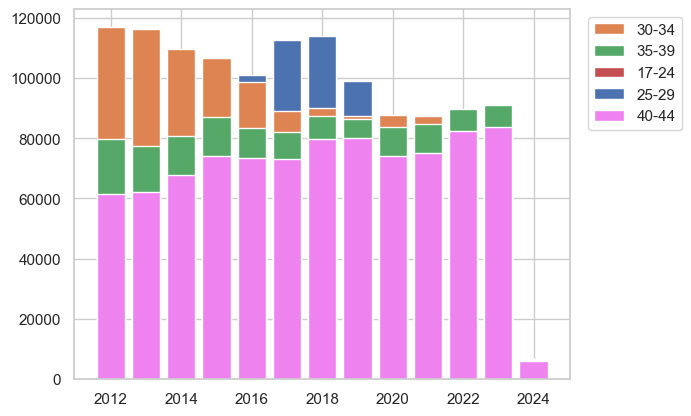

In [16]:
age_bins = ['17-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+']
age_bins.sort() 

plt.bar(visits_age_pivot_df.index, visits_age_pivot_df[age_bins[1]], label=f'{age_bins[1]}')
plt.bar(visits_age_pivot_df.index, visits_age_pivot_df[age_bins[2]], label=f'{age_bins[2]}') 
plt.bar(visits_age_pivot_df.index, visits_age_pivot_df[age_bins[3]], label=f'{age_bins[3]}')
plt.bar(visits_age_pivot_df.index, visits_age_pivot_df[age_bins[0]], label=f'{age_bins[0]}', color='r')
plt.bar(visits_age_pivot_df.index, visits_age_pivot_df[age_bins[4]], label=f'{age_bins[4]}', color='violet')
plt.bar(visits_age_pivot_df.index[:1], visits_age_pivot_df[age_bins[0]][:1], color='r')

# Order the legends
handles, labels = plt.gca().get_legend_handles_labels()
order = [age_bins.index(label) for label in labels]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='upper left', bbox_to_anchor=(1.02, 1))



In [19]:
visits_age_pivot_df

age_group,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65+
year,,,,,,,,,,
2012,3,2406,117081,79876,61453,50347,42247,32769,23601,14914
2013,1,22355,116432,77580,61996,51630,42431,32132,22623,12698
2014,9,53357,109669,80785,67942,57573,46955,35104,24178,12214
2015,12,81713,106542,87154,74008,62599,50054,37891,24469,11355
2016,15,101162,98871,83488,73325,60664,48384,35709,22584,9071
2017,1869,112696,89012,82187,73076,60861,46961,33974,21357,7108
2018,19857,114035,90119,87420,79729,64596,49132,34293,20533,5303
2019,41470,99055,87564,86525,80253,63769,47761,32518,18809,2945
2020,32808,76527,87664,83717,74199,56680,42273,27754,14556,1403


In [18]:
visits_age_df

,age_group,year,count
0,17-24,2012,3
1,17-24,2013,1
2,17-24,2014,9
3,17-24,2015,12
4,17-24,2016,15
...,...,...,...
125,65+,2020,1403
126,65+,2021,944
127,65+,2022,827
128,65+,2023,613


In [17]:
returning_donors = copy_gran_df.groupby('donor_id').filter(lambda x: len(x) > 1)
returning_donors_count = returning_donors.groupby(returning_donors['visit_date'].dt.year)['donor_id'].nunique().reset_index()
returning_donors_count.columns = ['year', 'returning_donors_count']
visits_df = visits_df.merge(returning_donors_count, on='year', how='left').fillna(0)
visits_df


,year,count,returning_donors_count
0,2012,424726,223586
1,2013,439907,250604
2,2014,487806,284252
3,2015,535822,310888
4,2016,533289,316915
5,2017,529124,315973
6,2018,565104,332245
7,2019,560777,331216
8,2020,497590,291616
9,2021,499765,282180


### General Retention Rate of Donors

In [98]:
visits_df['retention_rate'] = round(visits_df['returning_donors_count'].div(visits_df['count']) * 100,1)
print(visits_df)

KeyError: 'returning_donors_count'

In [ ]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

sns.lineplot(data=visits_df, x='year', y='retention_rate', color='black')
sns.scatterplot(data=visits_df, x='year', y='retention_rate', color='red')

plt.ylabel('Retention Rate')
plt.xlabel('Year')
plt.ylim(0)
plt.title("Trend of Retention in Malaysia")
plt.show()


### More Detailed Retention Rate of Donors

In [ ]:
regular_donors = returning_donors[returning_donors['days_since_last_visit'] <= 720]
regular_donors_count = regular_donors.groupby(regular_donors['visit_date'].dt.year)['donor_id'].nunique().reset_index()
regular_donors_count.columns = ['year', 'regular_donors_count']

regular_donors_count

,year,regular_donors_count
0,2012,223582
1,2013,250594
2,2014,270023
3,2015,279298
4,2016,273874
5,2017,262950
6,2018,266586
7,2019,262012
8,2020,227279
9,2021,220008


In [ ]:
lapsed_donors = returning_donors[returning_donors['days_since_last_visit'] > 720]
lapsed_donors_count = lapsed_donors.groupby(lapsed_donors['visit_date'].dt.year)['donor_id'].nunique().reset_index()
lapsed_donors_count.columns = ['year', 'lapsed_donor_count']

lapsed_donors_count


,year,lapsed_donor_count
0,2013,9
1,2014,15506
2,2015,35360
3,2016,48129
4,2017,59296
5,2018,73641
6,2019,77797
7,2020,75918
8,2021,72969
9,2022,100442


In [ ]:
new_donors_count = visits_df.copy()
new_donors_count['new_donors_count'] = new_donors_count['count'] - (returning_donors_count['returning_donors_count'])
new_donors_count = new_donors_count.fillna(0)
new_donors_count = new_donors_count.drop(['returning_donors_count','retention_rate'],axis=1)
new_donors_count

,year,count,new_donors_count
0,2012,424726,201144
1,2013,439907,189304
2,2014,487806,203561
3,2015,535822,224936
4,2016,533289,216377
5,2017,529124,213152
6,2018,565104,232864
7,2019,560777,229568
8,2020,497590,205981
9,2021,499765,217591


In [ ]:
new_visits_df = new_donors_count.merge(returning_donors_count, on='year', how='outer').merge(regular_donors_count, on='year', how='outer').merge(lapsed_donors_count, on='year', how='outer')
new_visits_df = new_visits_df.fillna(0)
new_visits_df['lapsed_donor_count'] = new_visits_df['lapsed_donor_count'].apply(lambda x:int(x))
new_visits_df


,year,count,new_donors_count,returning_donors_count,regular_donors_count,lapsed_donor_count
0,2012,424726,201144,223582,223582,0
1,2013,439907,189304,250603,250594,9
2,2014,487806,203561,284245,270023,15506
3,2015,535822,224936,310886,279298,35360
4,2016,533289,216377,316912,273874,48129
5,2017,529124,213152,315972,262950,59296
6,2018,565104,232864,332240,266586,73641
7,2019,560777,229568,331209,262012,77797
8,2020,497590,205981,291609,227279,75918
9,2021,499765,217591,282174,220008,72969


In [24]:
# new_visits_df.to_csv('new_visits_df.csv')

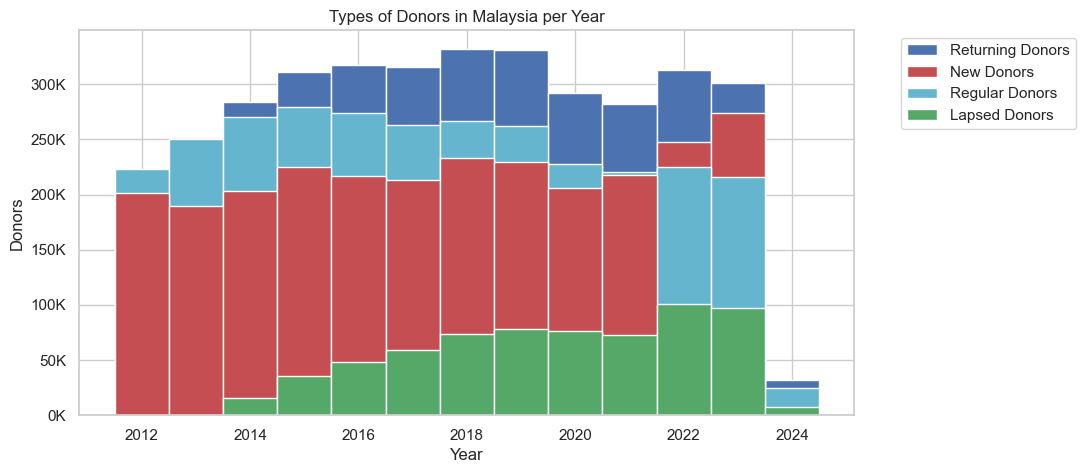

In [99]:
plt.figure(figsize=(10,5))

plt.bar(new_visits_df['year'],new_visits_df['returning_donors_count'],
        width=1,color='b',label='Returning Donors')
plt.bar(new_visits_df['year'],new_visits_df['new_donors_count'],
        width=1,color='r',label='New Donors')
plt.bar(new_visits_df['year'],new_visits_df['regular_donors_count'],
        width=1,color='c',label='Regular Donors')
plt.bar(new_visits_df['year'][:-3],new_visits_df['new_donors_count'][:-3],
        width=1,color='r')
plt.bar(new_visits_df['year'],new_visits_df['lapsed_donor_count'],
        width=1,color='g',label='Lapsed Donors')

formatter = ticker.FuncFormatter(lambda x,pos: f"{int(x/1000)}K")
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Year')
plt.ylabel('Donors')
plt.title('Types of Donors in Malaysia per Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Percentage Maybe?
# for i, value in enumerate(new_visits_df['returning_donors_count'][2:-1]):
#     plt.text(new_visits_df['year'][i+2], value - 30000 , f"{int(value/new_visits_df['count'][i+2]*100)}%", ha='center', color='k')
# # for i, value in enumerate(new_visits_df['new_donors_count'][:-1]):
# #     plt.text(new_visits_df['year'][i], value/2 , f"{int(value/new_visits_df['count'][i]*100)}%", ha='center', color='white')
# # for i, value in enumerate(new_visits_df['regular_donors_count'][:-1]):
# #     plt.text(new_visits_df['year'][i], value + 100, f"{int(value/new_visits_df['count'][i]*100)}%", ha='center', color='white')
# for i, value in enumerate(new_visits_df['lapsed_donor_count'][2:-1]):
#     plt.text(new_visits_df['year'][i+2], value/4, f"{int(value/new_visits_df['count'][i+2]*100)}%", ha='center', color='white')

plt.show()
plt.savefig("./images/trend_donor_type_malaysia")
plt.close()

In [101]:
new_retention_df = pd.DataFrame()
new_retention_df['year'] = new_visits_df['year'].copy()
new_retention_df['regular_donors_rtn'] = round(new_visits_df['regular_donors_count'].div(new_visits_df['count'])*100,2)
new_retention_df['lapsed_donors_rtn'] = round(new_visits_df['lapsed_donor_count'].div(new_visits_df['count'])*100,2)
new_retention_df

,year,regular_donors_rtn,lapsed_donors_rtn
0,2012,52.64,0.00
1,2013,56.97,0.00
2,2014,55.35,3.18
3,2015,52.13,6.60
4,2016,51.36,9.02
5,2017,49.70,11.21
6,2018,47.17,13.03
7,2019,46.72,13.87
8,2020,45.68,15.26
9,2021,44.02,14.60


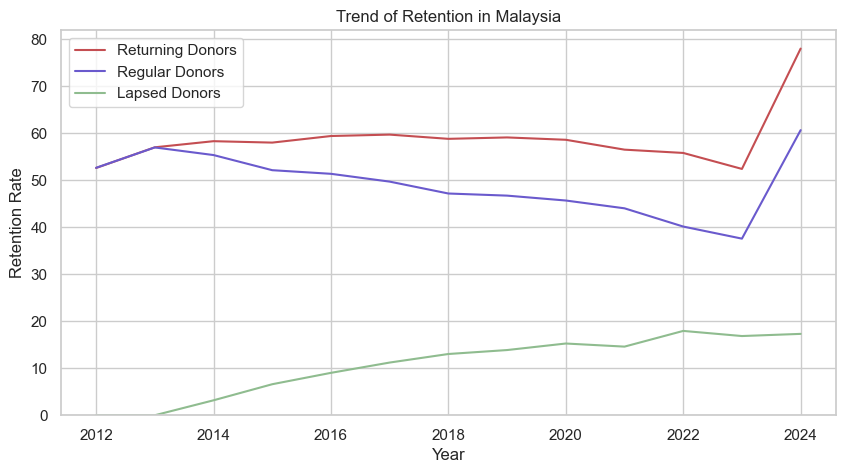

In [100]:

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

sns.lineplot(data=visits_df, 
             x='year', 
             y='retention_rate', 
             label='Returning Donors',
             color='r')

sns.lineplot(data=new_retention_df, 
             x='year', 
             y='regular_donors_rtn', 
             label='Regular Donors',
             color = 'slateblue')

sns.lineplot(data=new_retention_df, 
             x='year', 
             y='lapsed_donors_rtn', 
             label='Lapsed Donors',
             color='darkseagreen')

# plt.fill_between(visits_df['year'], visits_df['retention_rate'], color='pink')
# plt.fill_between(new_retention_df['year'], new_retention_df['regular_donors_rtn'], color='c')
# plt.fill_between(new_retention_df['year'], new_retention_df['lapsed_donors_rtn'], color='palegreen')

plt.ylabel('Retention Rate')
plt.xlabel('Year')
plt.ylim(0)
plt.title("Trend of Retention in Malaysia")
plt.show()
plt.savefig("./images/trend_retention_malaysia")
plt.close()


## Aggregate Data


## Import


In [26]:
import os
os.chdir('..')

from github import Github
from main_utils.vars import GITHUB_KEY
import typing 


token = GITHUB_KEY
g = Github(token)
repo = g.get_repo("MoH-Malaysia/data-darah-public")
contents = repo.get_contents('./')
content_links = [c.download_url for c in contents]


# if not os.path.exists('data'):
#     os.makedirs('data')

df_dict = {}
for link in content_links:
    filename = link.split('/')[-1]
    df_name = filename.split(".csv")[0]+"_df"
    
    df_dict[df_name] = pd.read_csv(link)
    # df_dict[df_name].to_csv(f'./data/{filename}', index=False)

In [27]:
df_dict.keys()

dict_keys(['donations_facility_df', 'donations_state_df', 'newdonors_facility_df', 'newdonors_state_df'])

In [28]:
donations_facility_df = df_dict['donations_facility_df']


In [29]:
df_dict['donations_state_df'].keys()

Index(['date', 'state', 'daily', 'blood_a', 'blood_b', 'blood_o', 'blood_ab',
       'location_centre', 'location_mobile', 'type_wholeblood',
       'type_apheresis_platelet', 'type_apheresis_plasma', 'type_other',
       'social_civilian', 'social_student', 'social_policearmy',
       'donations_new', 'donations_regular', 'donations_irregular'],
      dtype='object')

In [30]:
donations_state_df = df_dict['donations_state_df'][['date', 
                                                    'state', 
                                                    'daily',
                                                    'blood_a',
                                                    'blood_b',
                                                    'blood_o',
                                                    'blood_ab',
                                                    'location_centre',
                                                    'location_mobile',
                                                    'donations_new',
                                                    'donations_regular',
                                                    'donations_irregular',
                                                    ]].copy()
donations_state_df

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,donations_new,donations_regular,donations_irregular
0,2006-01-01,Malaysia,525,152,139,194,40,308,217,243,277,5
1,2006-01-02,Malaysia,227,53,43,112,19,162,65,83,143,1
2,2006-01-03,Malaysia,112,29,21,56,6,112,0,8,101,3
3,2006-01-04,Malaysia,391,92,98,165,36,145,246,286,102,3
4,2006-01-05,Malaysia,582,149,198,193,42,371,211,328,250,4
...,...,...,...,...,...,...,...,...,...,...,...,...
92423,2024-01-24,W.P. Kuala Lumpur,306,79,87,133,7,85,221,42,202,62
92424,2024-01-25,W.P. Kuala Lumpur,1521,334,475,687,25,114,1407,283,744,494
92425,2024-01-26,W.P. Kuala Lumpur,189,47,57,85,0,86,103,16,142,31
92426,2024-01-27,W.P. Kuala Lumpur,495,124,123,235,13,122,373,75,332,88


In [31]:
malaysia_donations_df = donations_state_df.loc[donations_state_df['state'] == 'Malaysia']
malaysia_donations_df


,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,donations_new,donations_regular,donations_irregular
0,2006-01-01,Malaysia,525,152,139,194,40,308,217,243,277,5
1,2006-01-02,Malaysia,227,53,43,112,19,162,65,83,143,1
2,2006-01-03,Malaysia,112,29,21,56,6,112,0,8,101,3
3,2006-01-04,Malaysia,391,92,98,165,36,145,246,286,102,3
4,2006-01-05,Malaysia,582,149,198,193,42,371,211,328,250,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6597,2024-01-24,Malaysia,1397,338,402,586,71,330,1067,357,728,312
6598,2024-01-25,Malaysia,2946,647,914,1280,105,235,2711,628,1447,871
6599,2024-01-26,Malaysia,781,192,211,354,24,317,464,100,549,132
6600,2024-01-27,Malaysia,1733,421,448,773,91,127,1606,411,981,341


In [32]:
malaysia_donations_df['date'] = pd.to_datetime(malaysia_donations_df['date'])
malaysia_visits_df = malaysia_donations_df.groupby(malaysia_donations_df['date'].dt.year)['daily'].sum().reset_index()
malaysia_visits_df.columns = ['year', 'count']
print(malaysia_visits_df)


    year   count
0   2006  218892
1   2007  279378
2   2008  348367
3   2009  385280
4   2010  393163
5   2011  416751
6   2012  424726
7   2013  439907
8   2014  487806
9   2015  535822
10  2016  533289
11  2017  529124
12  2018  565104
13  2019  560777
14  2020  497590
15  2021  499765
16  2022  559827
17  2023  575403
18  2024   45798


C:\Users\alifa\AppData\Local\Temp\ipykernel_17560\2531317845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malaysia_donations_df['date'] = pd.to_datetime(malaysia_donations_df['date'])


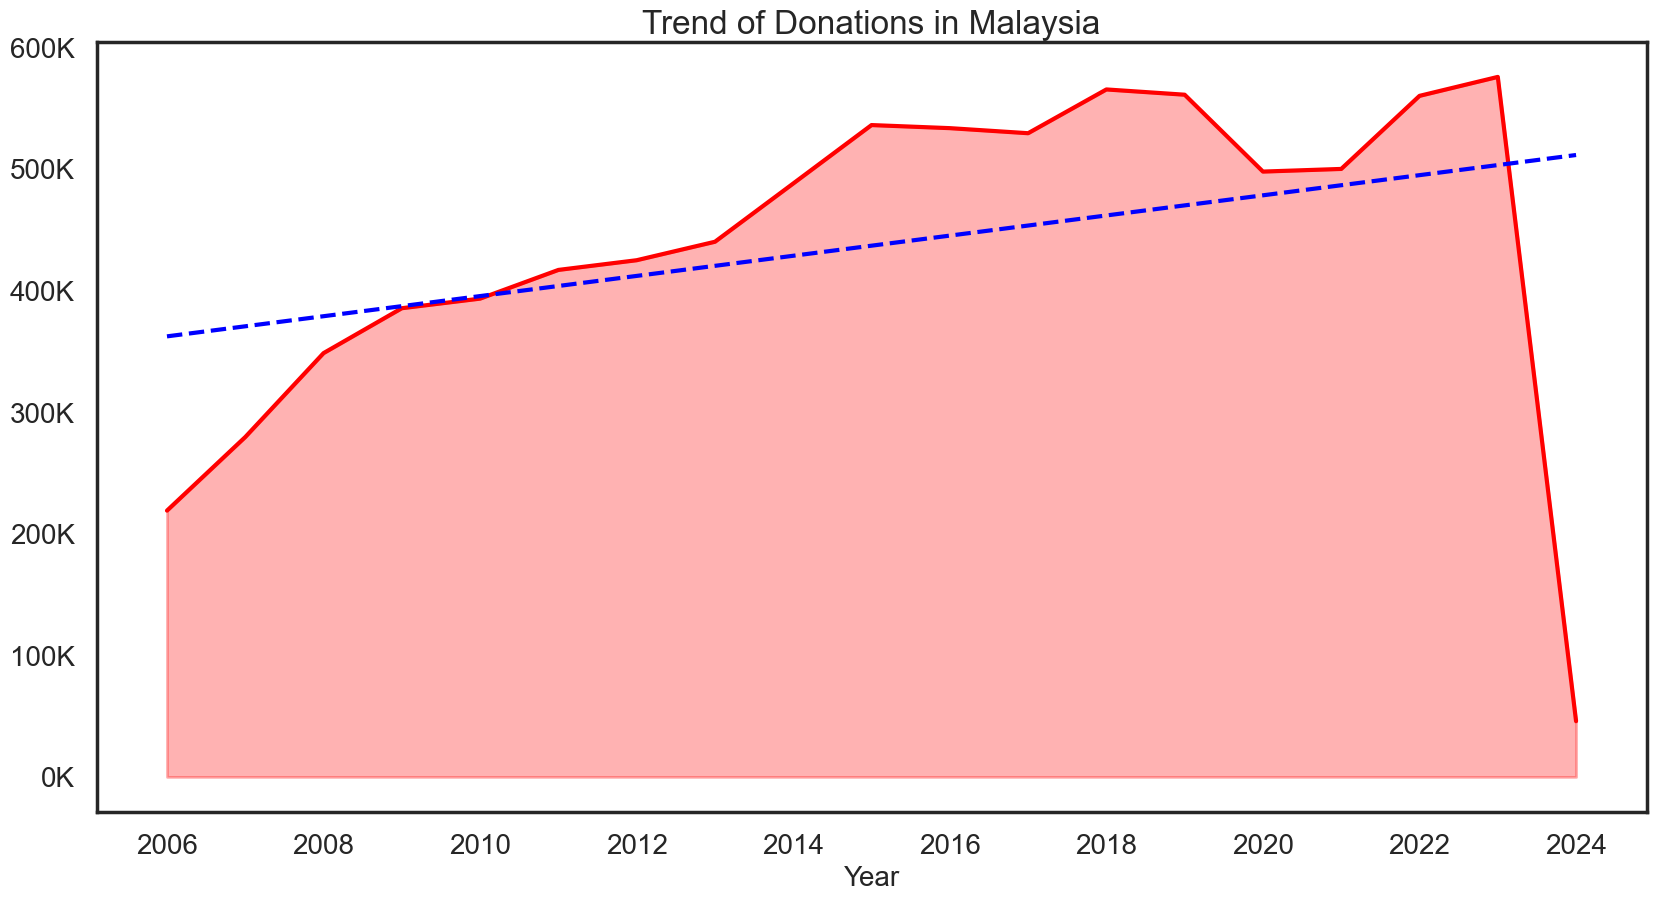

In [61]:
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns

plt.figure(figsize=(20,10))
sns.set_style('white')
sns.set_context("poster")
sns.despine()

# Remove the outlier of 2024
malaysia_visits_df_no_outlier = malaysia_visits_df[malaysia_visits_df['year'] != 2024]

sns.lineplot(data=malaysia_visits_df, x='year', y='count', color='red')
# Calculate the coefficients of the trend line
trend_coeffs = np.polyfit(range(len(malaysia_visits_df)), malaysia_visits_df['count'], 1)
trend_line = np.poly1d(trend_coeffs)

plt.plot(malaysia_visits_df['year'], trend_line(range(len(malaysia_visits_df))), color='blue', linestyle='--', label='Trend Line')
plt.fill_between(malaysia_visits_df['year'], malaysia_visits_df['count'], color='red', alpha=0.3)

formatter = ticker.FuncFormatter(lambda x,pos: f"{int(x/1000)}K")
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.ylabel('')
plt.xlabel('Year',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title("Trend of Donations in Malaysia")
plt.show()
plt.savefig("./images/trend_donations_malaysia")
plt.close()

In [34]:
average_7_df = malaysia_donations_df.drop(['location_mobile',
                                            'location_centre'],axis=1).copy()
average_7_df['7_days_avg'] = np.int32(average_7_df['daily'].rolling(window=7).mean().fillna(0))
average_7_df['7_days_avg_regular'] = np.int32(average_7_df['donations_regular'].rolling(window=7).mean().fillna(0))
average_7_df


,date,state,daily,blood_a,blood_b,blood_o,blood_ab,donations_new,donations_regular,donations_irregular,7_days_avg,7_days_avg_regular
0,2006-01-01,Malaysia,525,152,139,194,40,243,277,5,0,0
1,2006-01-02,Malaysia,227,53,43,112,19,83,143,1,0,0
2,2006-01-03,Malaysia,112,29,21,56,6,8,101,3,0,0
3,2006-01-04,Malaysia,391,92,98,165,36,286,102,3,0,0
4,2006-01-05,Malaysia,582,149,198,193,42,328,250,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6597,2024-01-24,Malaysia,1397,338,402,586,71,357,728,312,1540,923
6598,2024-01-25,Malaysia,2946,647,914,1280,105,628,1447,871,1731,1014
6599,2024-01-26,Malaysia,781,192,211,354,24,100,549,132,1699,1007
6600,2024-01-27,Malaysia,1733,421,448,773,91,411,981,341,1680,989


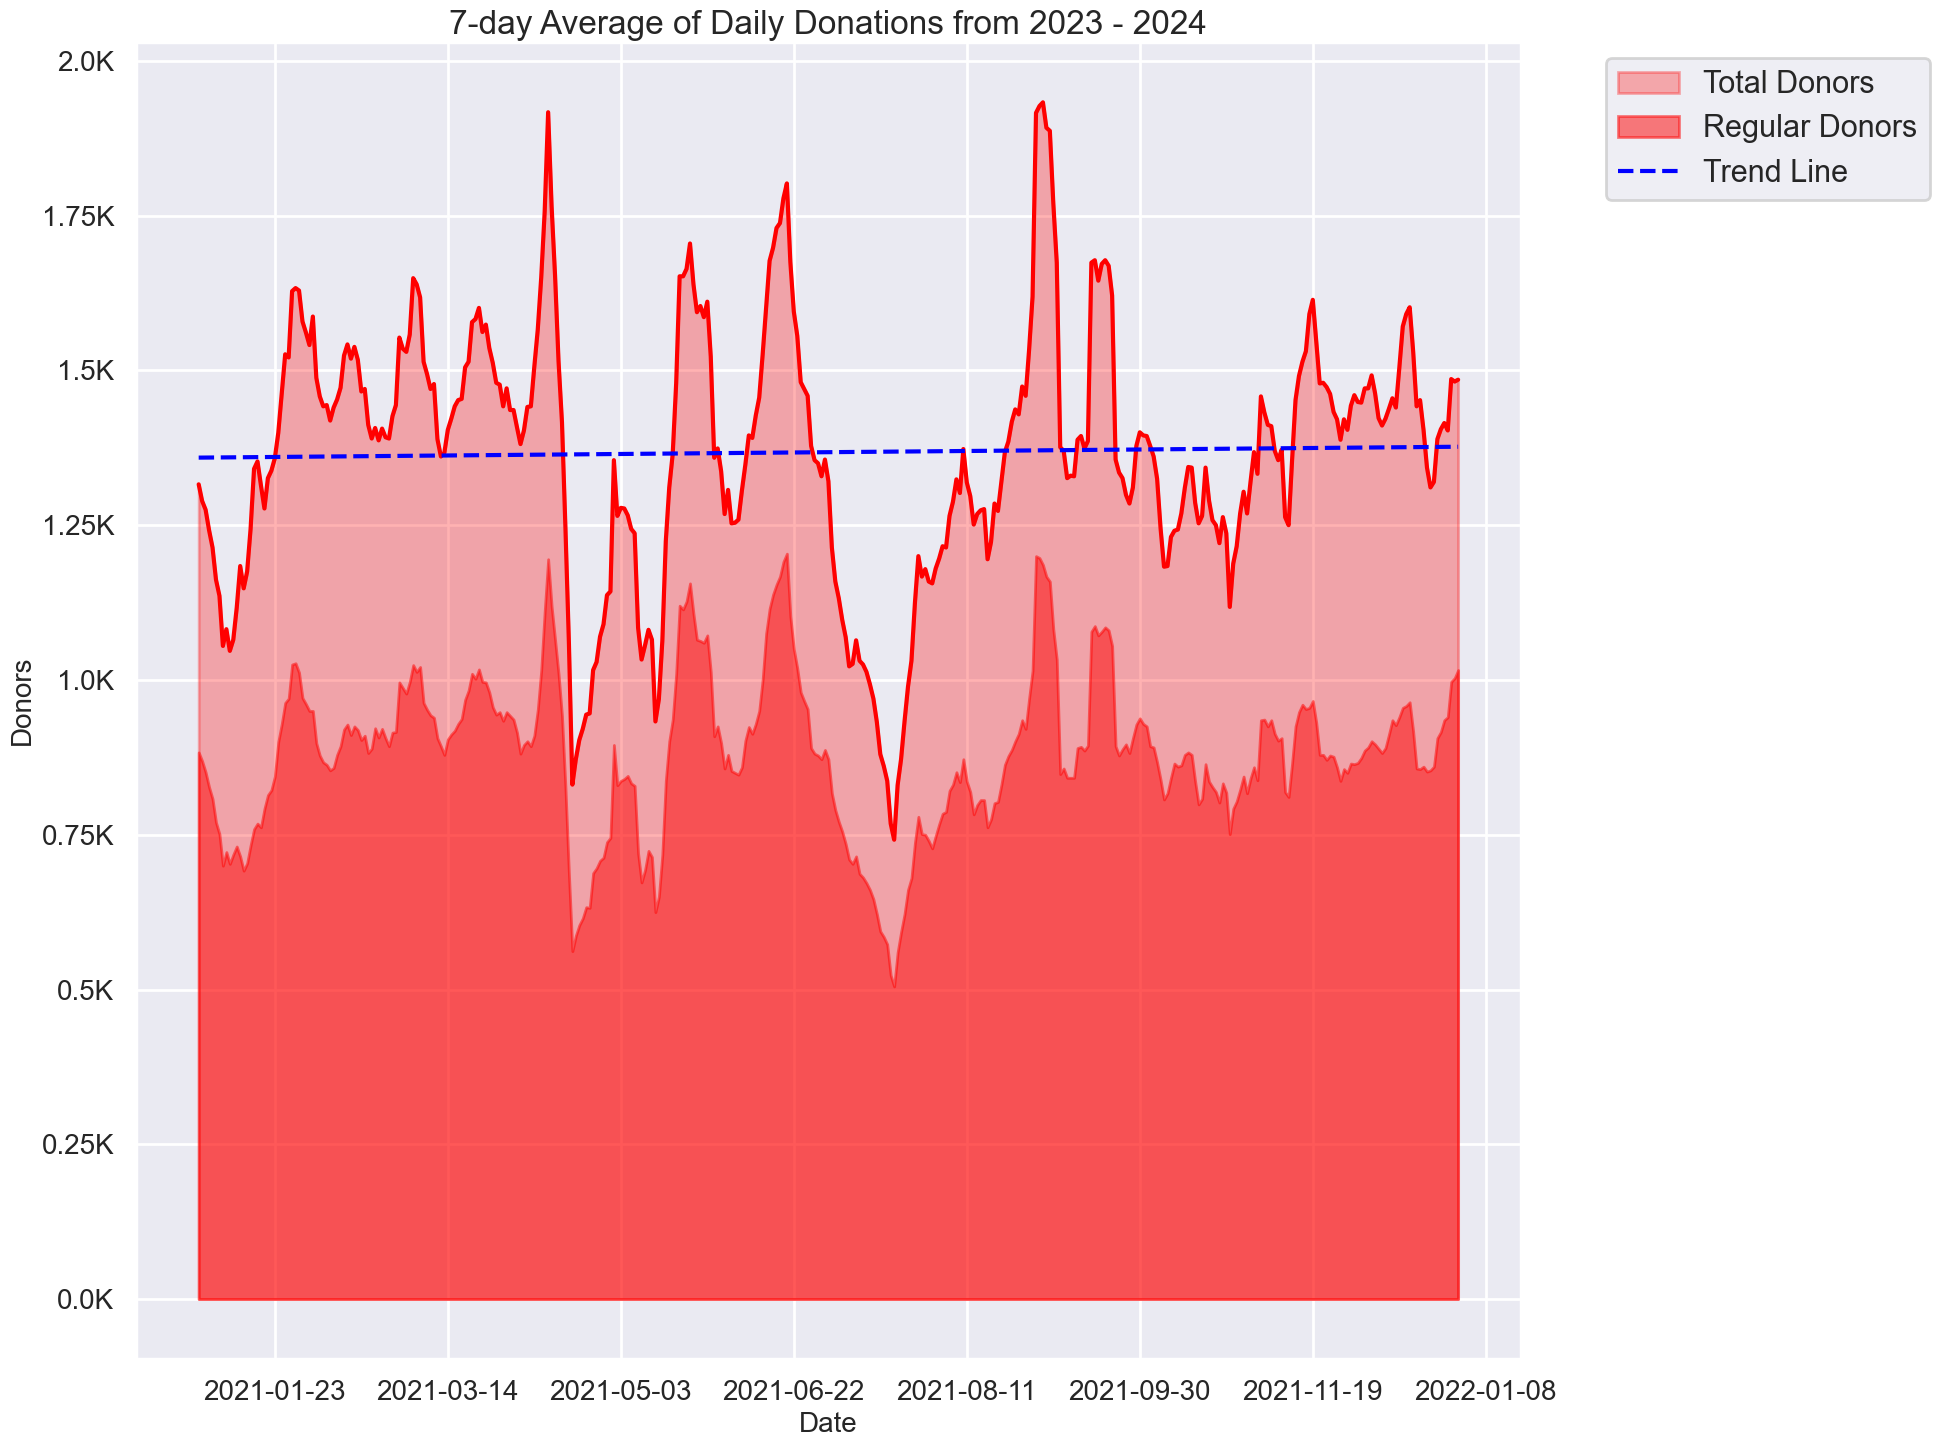

In [95]:
import numpy as np
plt.figure(figsize=(20,15))
# sns.set_style('whitegrid')
sns.set_context("poster")
# sns.set_theme()
sns.despine()


start_year = (pd.to_datetime(average_7_df['date']).dt.year >=  datetime.now().year - 3)
end_year = (pd.to_datetime(average_7_df['date']).dt.year <= datetime.now().year-3)
filtered_df = average_7_df[(start_year) & (end_year)]

plt.plot(pd.to_datetime(filtered_df['date']), filtered_df['7_days_avg'],color = 'red')
plt.fill_between(pd.to_datetime(filtered_df['date']), filtered_df['7_days_avg'],color = 'red',alpha =0.3,label = 'Total Donors')
plt.fill_between(pd.to_datetime(filtered_df['date']), filtered_df['7_days_avg_regular'],color = 'red',alpha =0.5,label = 'Regular Donors')

# Calculate the coefficients of the trend line
trend_coeffs = np.polyfit(range(len(filtered_df)), filtered_df['7_days_avg'], 1)
trend_line = np.poly1d(trend_coeffs)
plt.plot(pd.to_datetime(filtered_df['date']), trend_line(range(len(filtered_df))), color='blue', linestyle='--', label='Trend Line')

# avg_line = np.mean(filtered_df['7_days_avg']) 
# print(avg_line)
# plt.axhline(avg_line, color='green', linestyle='--', label='Average Line')

formatter = ticker.FuncFormatter(lambda x,pos: f"{float(x/1000)}K")

plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.xlabel('Date',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Donors',fontsize=20)
plt.title(f'7-day Average of Daily Donations from {datetime.now().year - 1} - {datetime.now().year}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


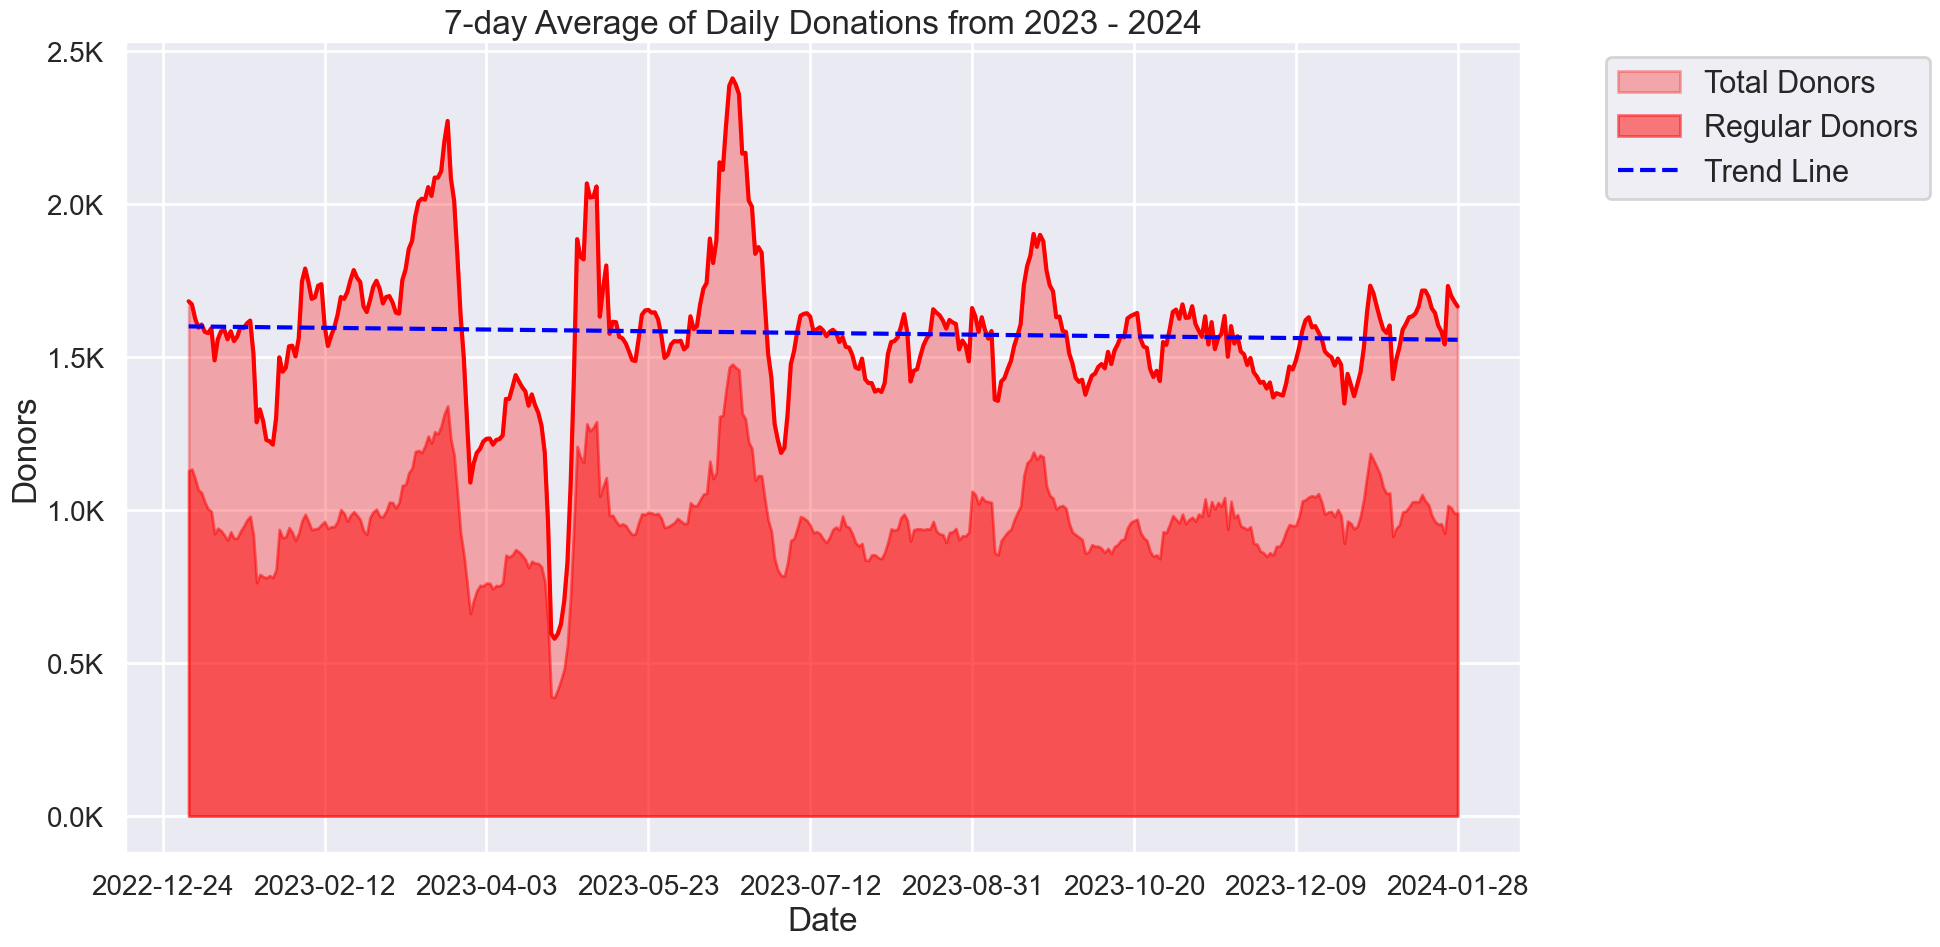

In [77]:
import numpy as np
plt.figure(figsize=(20,10))
sns.set_theme()
sns.set_context("poster")

start_year = (pd.to_datetime(average_7_df['date']).dt.year >=  datetime.now().year - 1)
end_year = (pd.to_datetime(average_7_df['date']).dt.year <= datetime.now().year)
filtered_df = average_7_df[(start_year) & (end_year)]

plt.plot(pd.to_datetime(filtered_df['date']), filtered_df['7_days_avg'],color = 'red')
plt.fill_between(pd.to_datetime(filtered_df['date']), filtered_df['7_days_avg'],color = 'red',alpha =0.3,label = 'Total Donors')
plt.fill_between(pd.to_datetime(filtered_df['date']), filtered_df['7_days_avg_regular'],color = 'red',alpha =0.5,label = 'Regular Donors')

# Calculate the coefficients of the trend line
trend_coeffs = np.polyfit(range(len(filtered_df)), filtered_df['7_days_avg'], 1)
trend_line = np.poly1d(trend_coeffs)

plt.plot(pd.to_datetime(filtered_df['date']), trend_line(range(len(filtered_df))), color='blue', linestyle='--', label='Trend Line')

formatter = ticker.FuncFormatter(lambda x,pos: f"{float(x/1000)}K")
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.xlabel('Date')
plt.ylabel('Donors')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(f'7-day Average of Daily Donations from {datetime.now().year - 1} - {datetime.now().year}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## State Trend Plot

In [79]:
state_donations_df = donations_state_df.loc[donations_state_df['state'] != 'Malaysia']
state_donations_df


,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,donations_new,donations_regular,donations_irregular
6602,2006-01-01,Johor,87,19,20,45,3,87,0,36,49,2
6603,2006-01-02,Johor,15,4,3,6,2,15,0,4,11,0
6604,2006-01-03,Johor,8,2,2,4,0,8,0,2,5,1
6605,2006-01-04,Johor,33,7,11,12,3,33,0,25,8,0
6606,2006-01-05,Johor,20,3,8,8,1,20,0,16,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
92423,2024-01-24,W.P. Kuala Lumpur,306,79,87,133,7,85,221,42,202,62
92424,2024-01-25,W.P. Kuala Lumpur,1521,334,475,687,25,114,1407,283,744,494
92425,2024-01-26,W.P. Kuala Lumpur,189,47,57,85,0,86,103,16,142,31
92426,2024-01-27,W.P. Kuala Lumpur,495,124,123,235,13,122,373,75,332,88


In [80]:
state_donations_df['date'] = pd.to_datetime(state_donations_df['date'])
state_visits_df = state_donations_df.pivot_table(index=state_donations_df['date'].dt.year, columns='state', values='daily', aggfunc='sum').reset_index()
state_visits_df.columns = ['year'] + state_visits_df.columns[1:].tolist()
print(state_visits_df)

    year  Johor  Kedah  Kelantan  Melaka  Negeri Sembilan  Pahang  Perak  \
0   2006   8487  30056      5328    6976             3887    3258     53   
1   2007   6462  27126      9786   24078            13284    3237     53   
2   2008   9336  42739     11308   26107            13723    3140  23714   
3   2009  25702  44862     11520   26653            13001    3414  26092   
4   2010  32535  47301     12607   27341            14111    3322  28340   
5   2011  32812  53314     10916   27532            14498    7458  32125   
6   2012  34180  53664      9052   27807            14299   12587  33604   
7   2013  34370  54989     10351   29156            15834   11491  38515   
8   2014  35820  57014     10504   28079            14785   11550  38455   
9   2015  36912  59888     15468   28539            17011   11677  39803   
10  2016  30601  58750     15111   29942            17955   10995  41848   
11  2017  34549  61386        35   30233            17111    9552  41975   
12  2018  36

C:\Users\alifa\AppData\Local\Temp\ipykernel_17560\1052565719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_donations_df['date'] = pd.to_datetime(state_donations_df['date'])


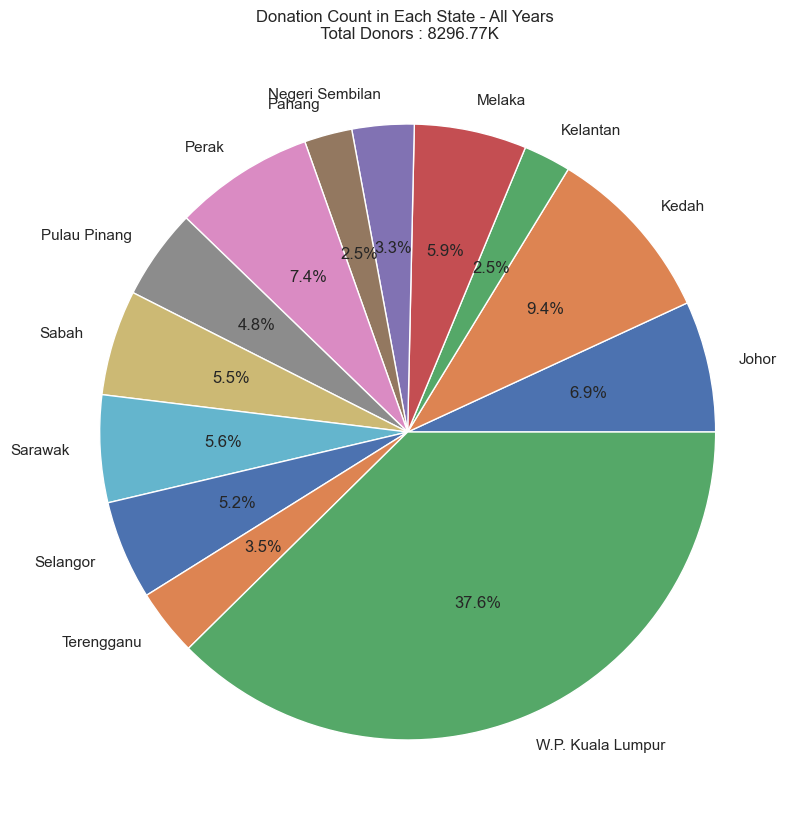

In [89]:
# Sum the donation counts for all years
# state_visits_sum = state_visits_df.loc[state_visits_df['year'] >= 2016].iloc[:, 1:].sum()
state_visits_sum_all_years = state_visits_df.iloc[:, 1:].sum()

# Create a pie chart for the summation of all years
plt.figure(figsize=(20,10))
# sns.set_theme()
sns.set_context('notebook')

plt.pie(state_visits_sum_all_years, labels=state_visits_sum_all_years.index, autopct='%1.1f%%',radius=1)
plt.title(f"Donation Count in Each State - All Years \n Total Donors : {round(state_visits_sum_all_years.sum()/1000,2)}K")
plt.show()

# # Create a pie chart for the summation of all years
# plt.figure(figsize=(10,8))
# plt.pie(state_visits_sum, labels=state_visits_sum.index, autopct='%1.1f%%')
# plt.title(f"Donation Count in Each State - From 2016 \n Total Donors : {round(state_visits_sum.sum()/1000,2)}K")
# plt.show()


C:\Users\alifa\AppData\Local\Temp\ipykernel_17560\2600104769.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('OrRd', len(state_visits_2024))


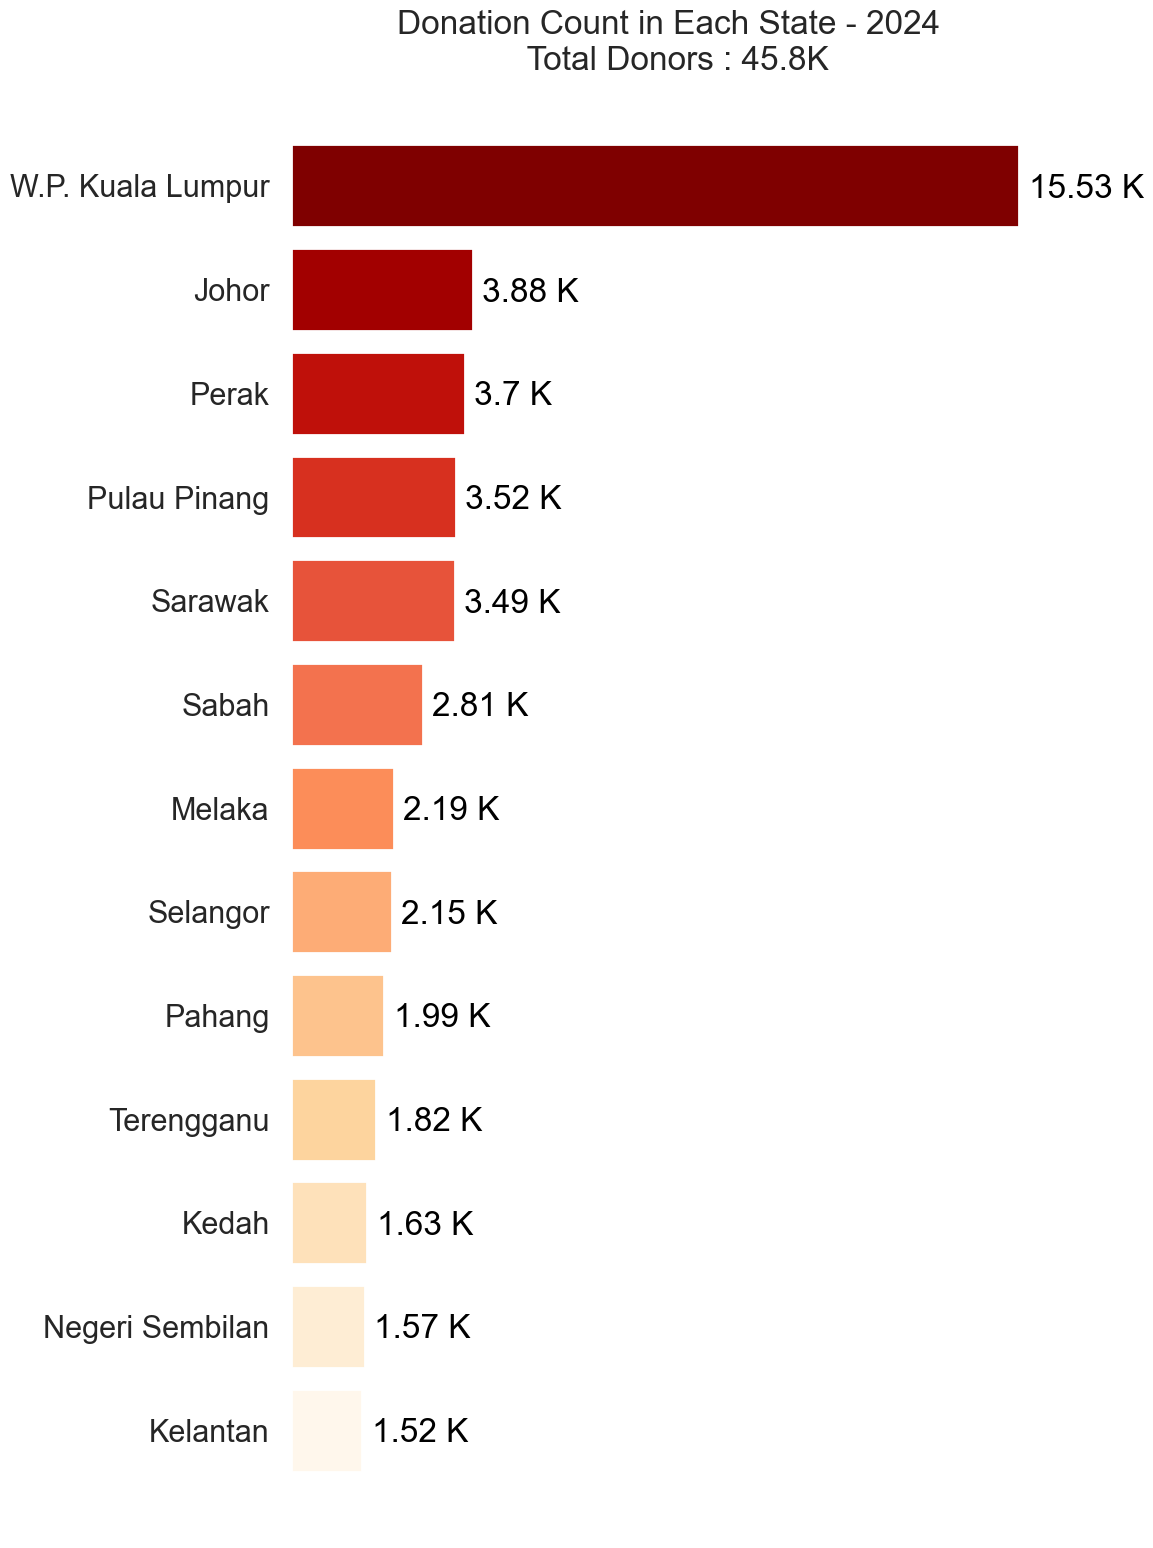

In [162]:
import numpy as np
import matplotlib.ticker as ticker

# Filter the dataframe for the year 2024
state_visits_2024 = state_visits_df[state_visits_df['year'] == 2024].iloc[:, 1:].sum()

# Sort the states based on the number of counts
sorted_states = state_visits_2024.sort_values(ascending=True).index

# Create a horizontal bar chart for the year 2024 with color hue gradient
plt.figure(figsize=(12,16))
sns.set_context('poster')
plt.box(False)
sns.set_style('white')

colors = plt.cm.get_cmap('OrRd', len(state_visits_2024))

# Plot the horizontal bar chart
plt.barh(sorted_states, state_visits_2024[sorted_states], color=colors(np.arange(len(state_visits_2024))))
for i, v in enumerate(state_visits_2024[sorted_states]):
    plt.text(v + 200, i, f"{str(round(v/1000,2))} K", color='black', va='center_baseline')

plt.title(f"Donation Count in Each State - 2024 \n Total Donors : {round(state_visits_2024.sum()/1000,2)}K")
plt.xticks([])
plt.tight_layout()
plt.show()

# plt.show()


C:\Users\alifa\AppData\Local\Temp\ipykernel_17560\1481899506.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('OrRd', len(state_visits_2024))


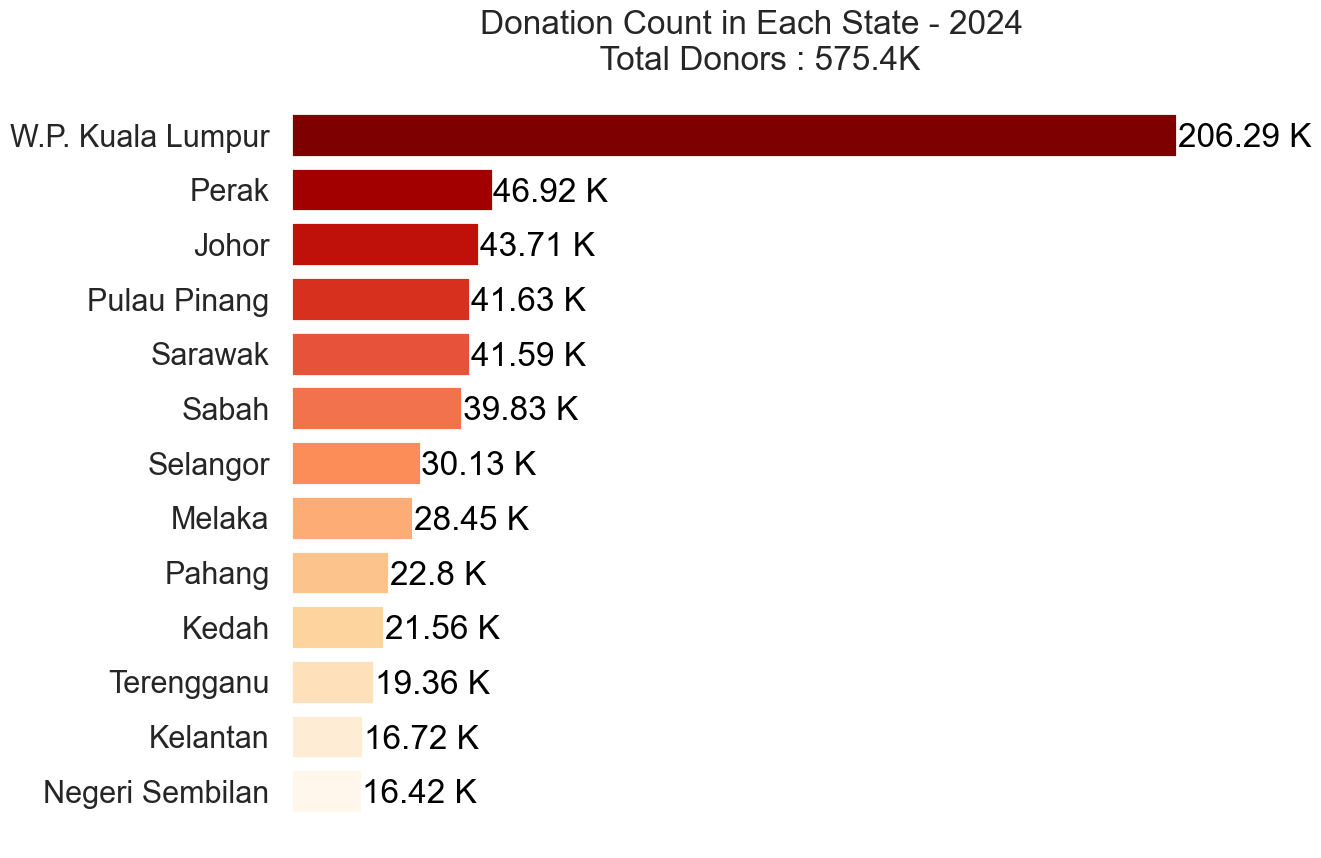

In [164]:
import numpy as np
import matplotlib.ticker as ticker

# Filter the dataframe for the year 2024
state_visits_2024 = state_visits_df[state_visits_df['year'] == 2023].iloc[:, 1:].sum()

# Sort the states based on the number of counts
sorted_states = state_visits_2024.sort_values(ascending=True).index

# Create a horizontal bar chart for the year 2024 with color hue gradient
plt.figure(figsize=(12,10))
sns.set_context('poster')
plt.box(False)
sns.set_style('white')

colors = plt.cm.get_cmap('OrRd', len(state_visits_2024))
plt.barh(sorted_states, state_visits_2024[sorted_states], color=colors(np.arange(len(state_visits_2024))))
for i, v in enumerate(state_visits_2024[sorted_states]):
    plt.text(v + 200, i, f"{str(round(v/1000,2))} K", color='black', va='center_baseline')
plt.title(f"Donation Count in Each State - 2024 \n Total Donors : {round(state_visits_2024.sum()/1000,2)}K")
plt.xticks([])
plt.show()


In [44]:
no_wp_state_donations_df = donations_state_df.loc[(donations_state_df['state'] != 'Malaysia') & (donations_state_df['state'] != 'W.P. Kuala Lumpur')]
no_wp_state_donations_df



,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,donations_new,donations_regular,donations_irregular
6599,2006-01-01,Johor,87,19,20,45,3,87,0,36,49,2
6600,2006-01-02,Johor,15,4,3,6,2,15,0,4,11,0
6601,2006-01-03,Johor,8,2,2,4,0,8,0,2,5,1
6602,2006-01-04,Johor,33,7,11,12,3,33,0,25,8,0
6603,2006-01-05,Johor,20,3,8,8,1,20,0,16,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
85782,2024-01-21,Terengganu,52,12,14,24,2,15,37,10,31,11
85783,2024-01-22,Terengganu,10,2,3,3,2,10,0,1,8,1
85784,2024-01-23,Terengganu,46,11,16,19,0,1,45,13,28,5
85785,2024-01-24,Terengganu,35,8,10,15,2,6,29,4,24,7


In [45]:
no_wp_state_donations_df['date'] = pd.to_datetime(no_wp_state_donations_df['date'])
state_visits_df = no_wp_state_donations_df.pivot_table(index=no_wp_state_donations_df['date'].dt.year, columns='state', values='daily', aggfunc='sum').reset_index()
state_visits_df.columns = ['year'] + state_visits_df.columns[1:].tolist()
print(state_visits_df)

    year  Johor  Kedah  Kelantan  Melaka  Negeri Sembilan  Pahang  Perak  \
0   2006   8487  30056      5328    6976             3887    3258     53   
1   2007   6462  27126      9786   24078            13284    3237     53   
2   2008   9336  42739     11308   26107            13723    3140  23714   
3   2009  25702  44862     11520   26653            13001    3414  26092   
4   2010  32535  47301     12607   27341            14111    3322  28340   
5   2011  32812  53314     10916   27532            14498    7458  32125   
6   2012  34180  53664      9052   27807            14299   12587  33604   
7   2013  34370  54989     10351   29156            15834   11491  38515   
8   2014  35820  57014     10504   28079            14785   11550  38455   
9   2015  36912  59888     15468   28539            17011   11677  39803   
10  2016  30601  58750     15111   29942            17955   10995  41848   
11  2017  34549  61386        35   30233            17111    9552  41975   
12  2018  36

C:\Users\alifa\AppData\Local\Temp\ipykernel_16028\345282778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_wp_state_donations_df['date'] = pd.to_datetime(no_wp_state_donations_df['date'])


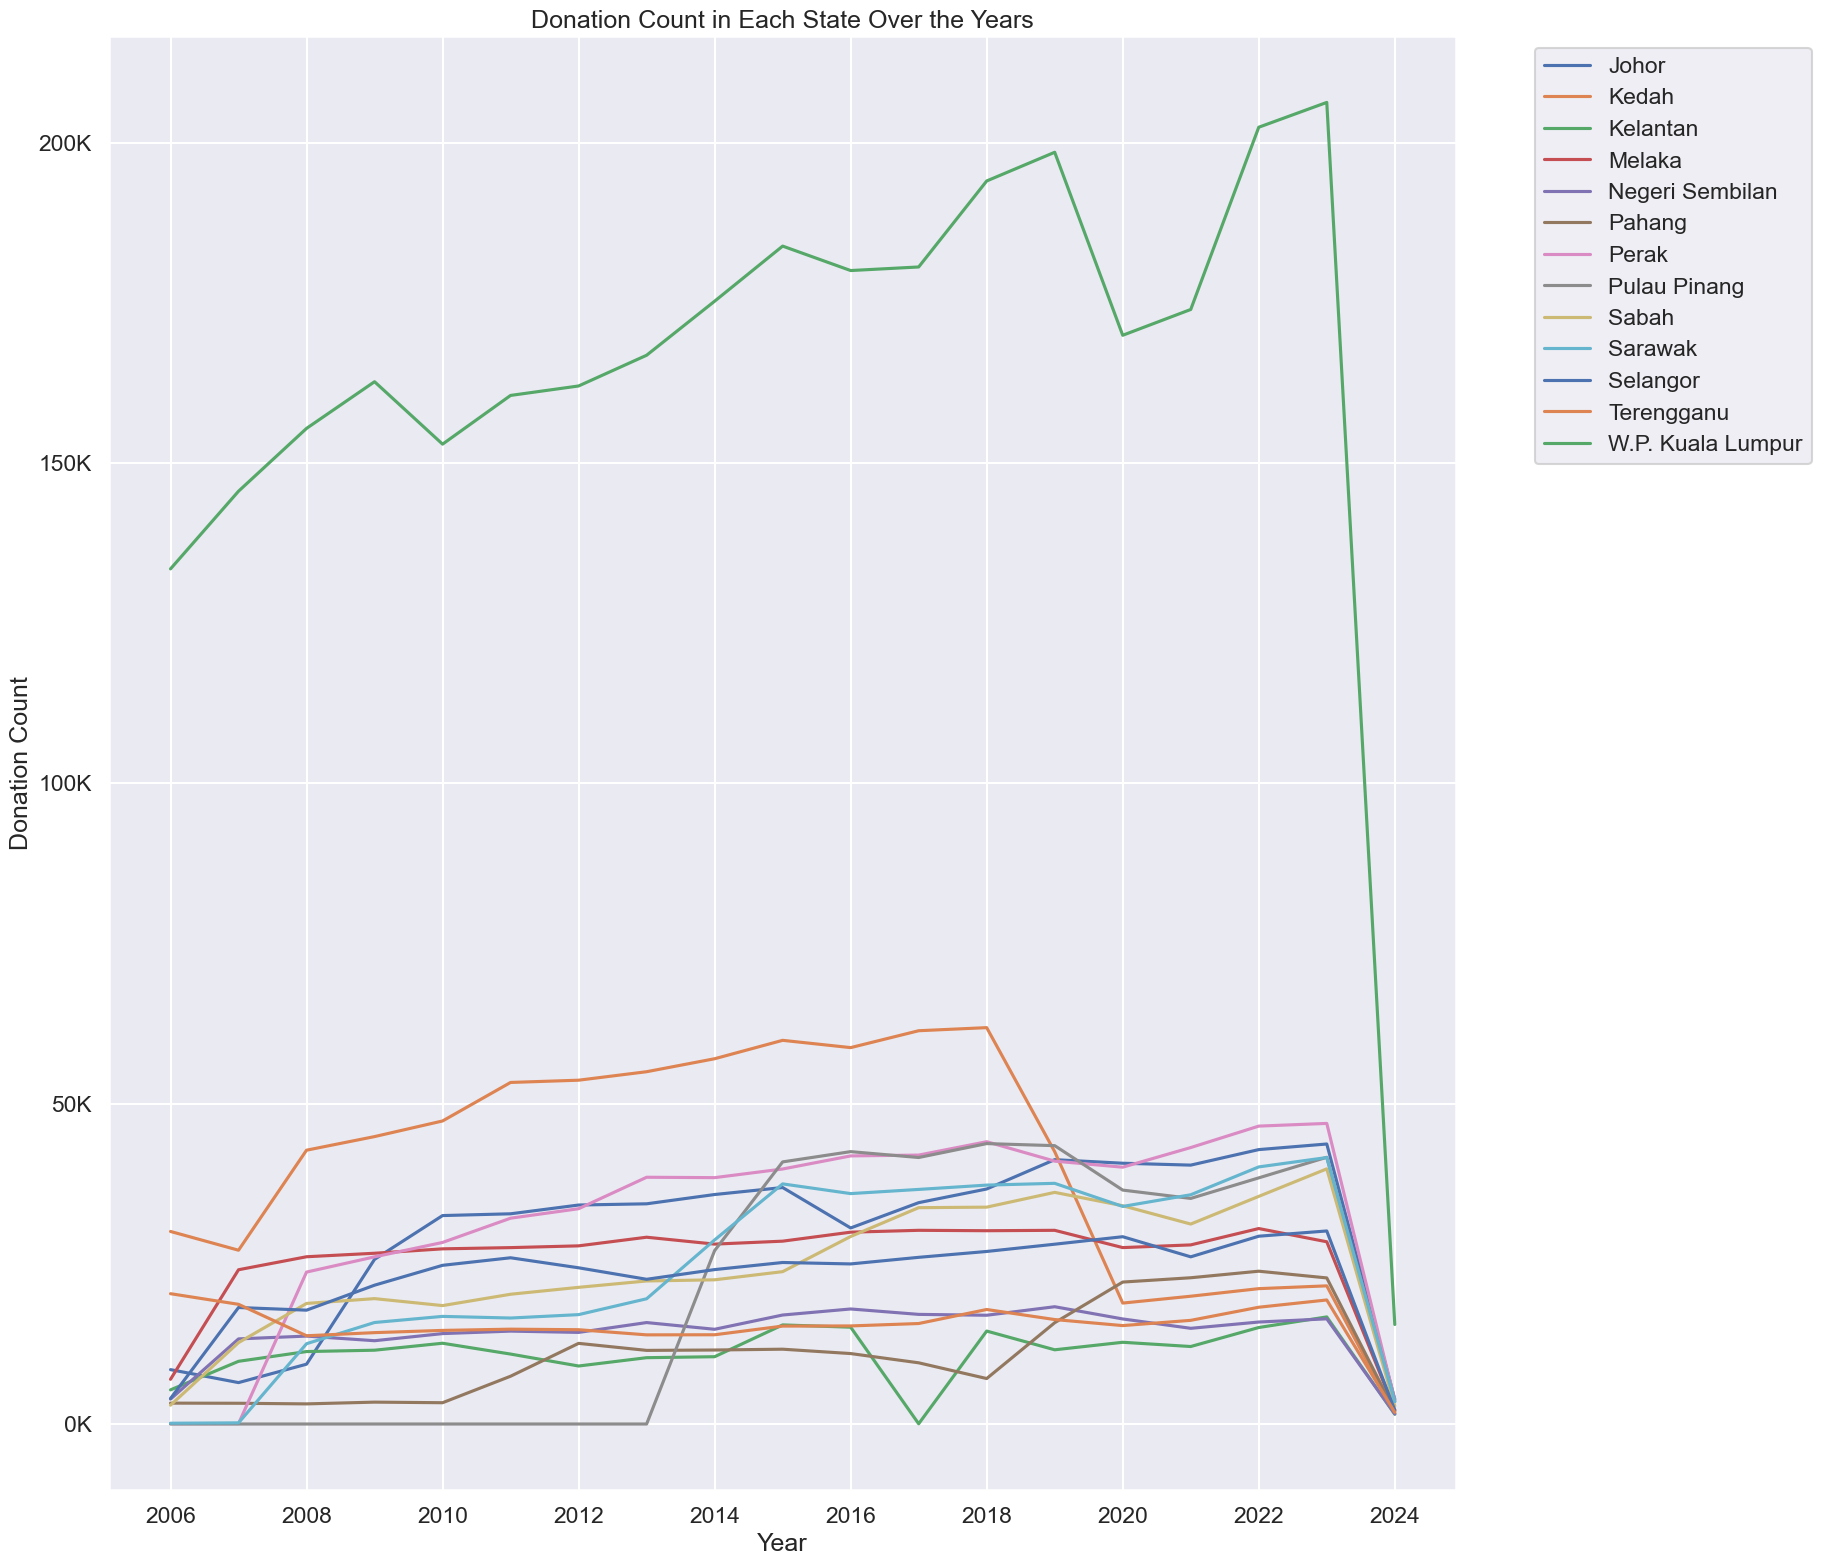

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the area chart with unique colors for each state
state_visits_df.plot(x='year',kind='line',figsize=(15,16))
# Add labels and title
sns.set_theme()
sns.set_context('talk')

plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlabel('Year')
plt.ylabel('Donation Count')
plt.title('Donation Count in Each State Over the Years')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1))

# Show the plot
plt.show()


## Locations Donated at

In [185]:
wp_state_donations_df = donations_state_df.loc[donations_state_df['state'] == 'Malaysia']
wp_state_donations_df['date'] = pd.to_datetime(wp_state_donations_df['date'])
state_visits_df = wp_state_donations_df.pivot_table(index=wp_state_donations_df['date'].dt.year,values=['location_mobile','location_centre'], aggfunc='sum').reset_index()
state_visits_df


C:\Users\alifa\AppData\Local\Temp\ipykernel_17560\950653276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wp_state_donations_df['date'] = pd.to_datetime(wp_state_donations_df['date'])


,date,location_centre,location_mobile
0,2006,103546,115346
1,2007,152080,127298
2,2008,212891,135476
3,2009,244567,140713
4,2010,264046,129117
5,2011,280591,136160
6,2012,294037,130689
7,2013,304619,135288
8,2014,346617,141189
9,2015,382673,153149


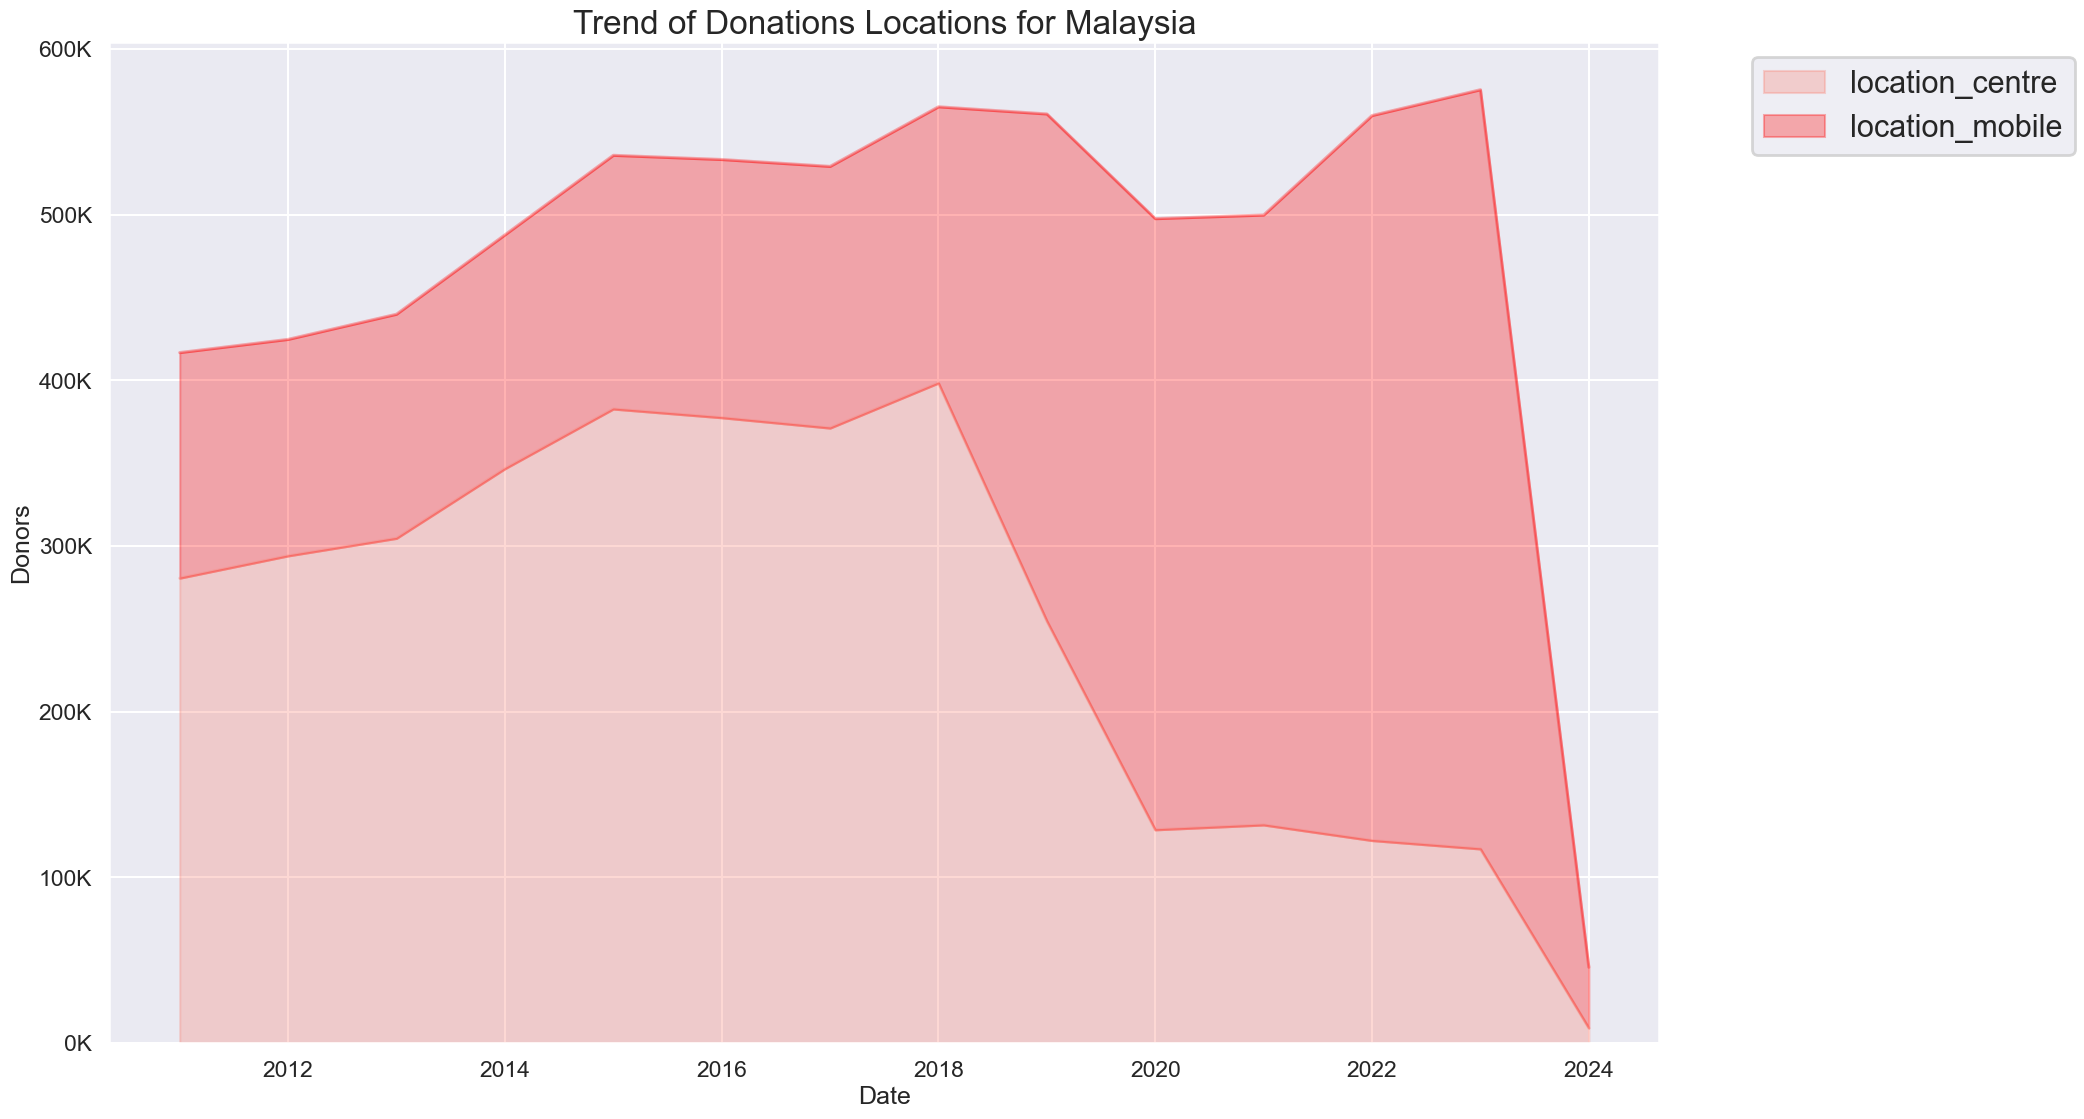

In [191]:
state_visits_df[5:].plot(x='date',kind='area',color=['salmon','red'],alpha=0.3,figsize=(20,13))
sns.set_theme()
sns.set_context('poster')

formatter = ticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}K")
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.xlabel('Date')
plt.ylabel('Donors')
plt.title(f'Trend of Donations Locations for Malaysia')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\alifa\AppData\Local\Temp\ipykernel_17560\778924649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wp_state_donations_df['date'] = pd.to_datetime(wp_state_donations_df['date'])


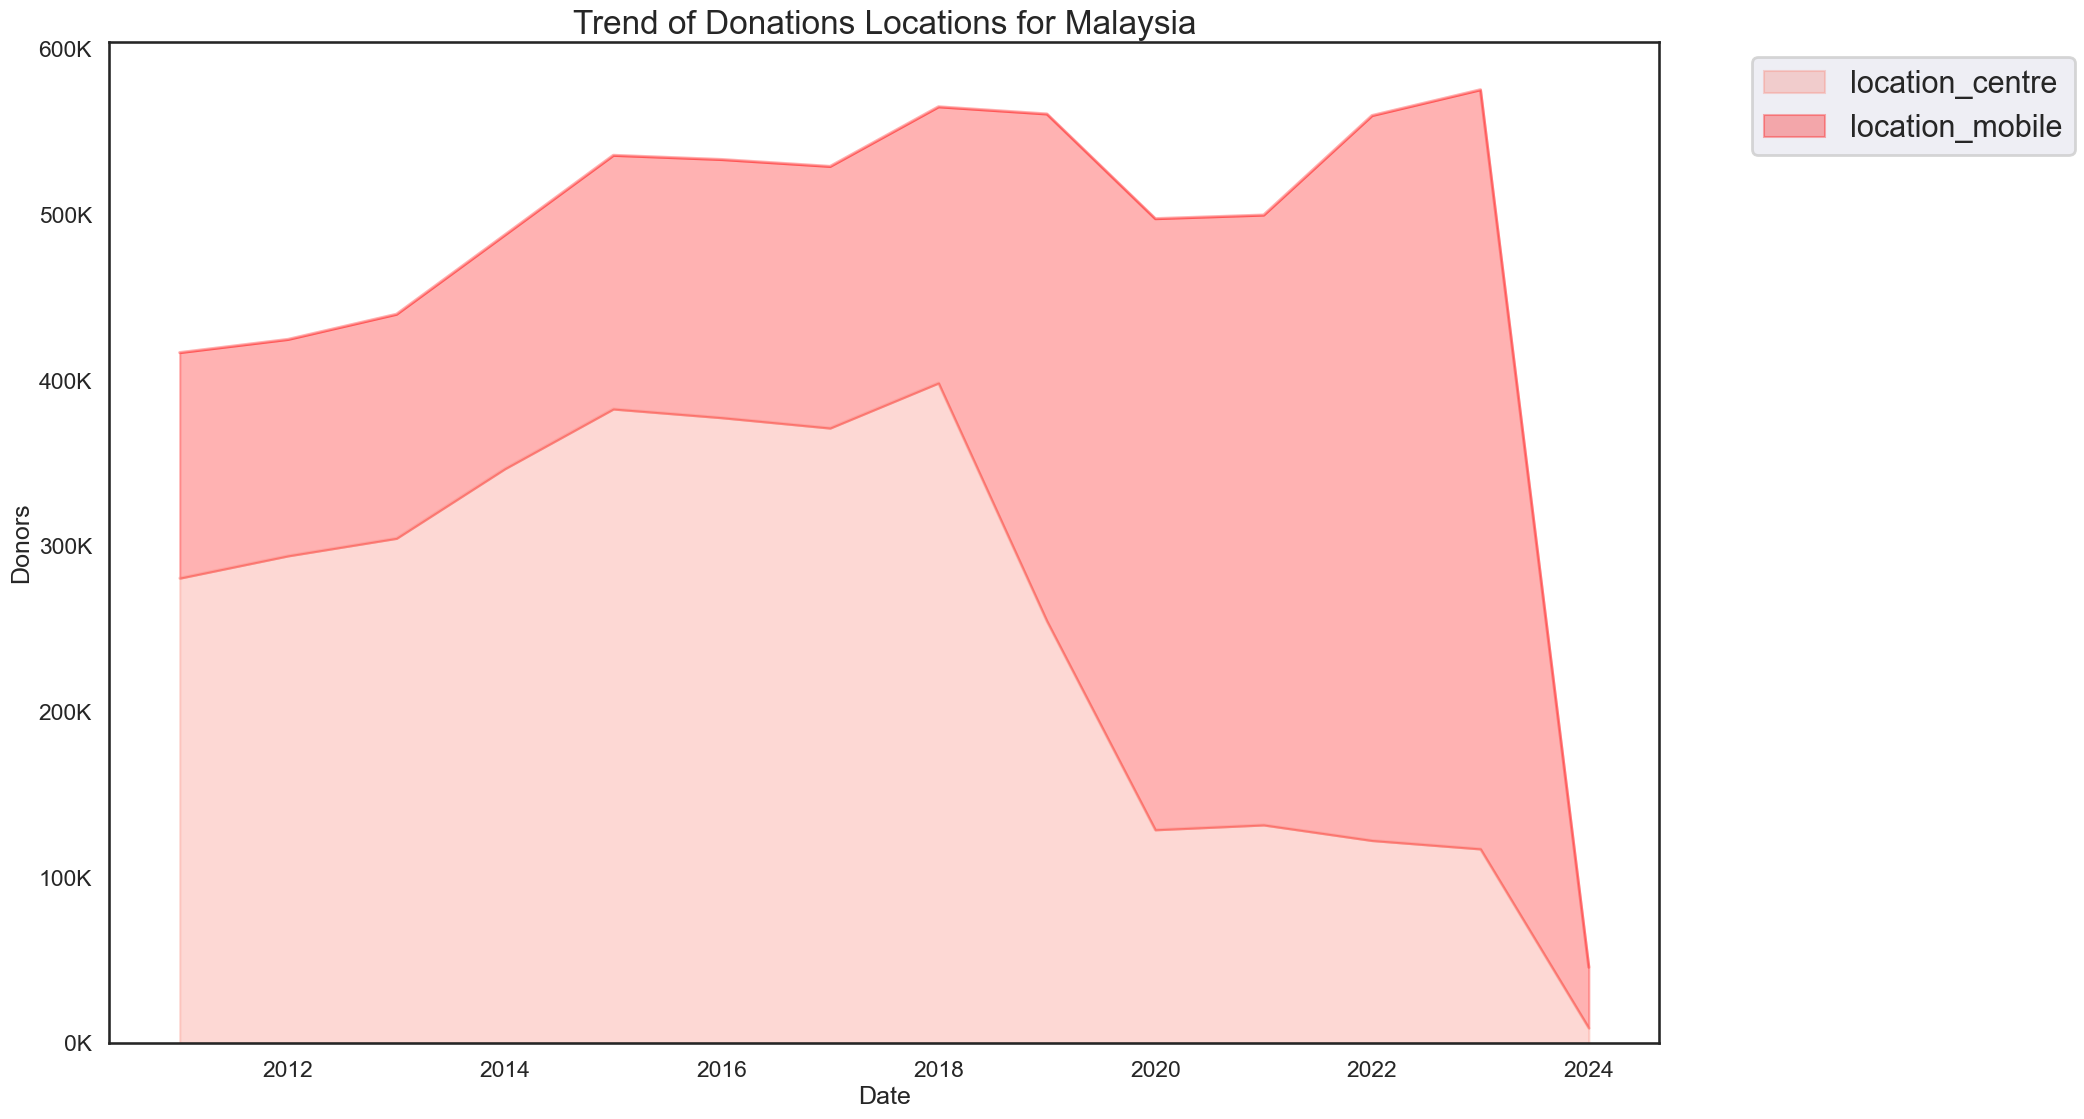

In [276]:

wp_state_donations_df = donations_state_df.loc[donations_state_df['state'] == 'Malaysia']
wp_state_donations_df['date'] = pd.to_datetime(wp_state_donations_df['date'])
state_visits_df = wp_state_donations_df.pivot_table(index=wp_state_donations_df['date'].dt.year,values=['location_mobile','location_centre'], aggfunc='sum').reset_index()

state_visits_df[5:].plot(x='date',kind='area',color=['salmon','red'],alpha=0.3,figsize=(20,13))
sns.set_theme()
sns.set_context('poster')

formatter = ticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}K")
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.xlabel('Date')
plt.ylabel('Donors')
plt.title(f'Trend of Donations Locations for Malaysia')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

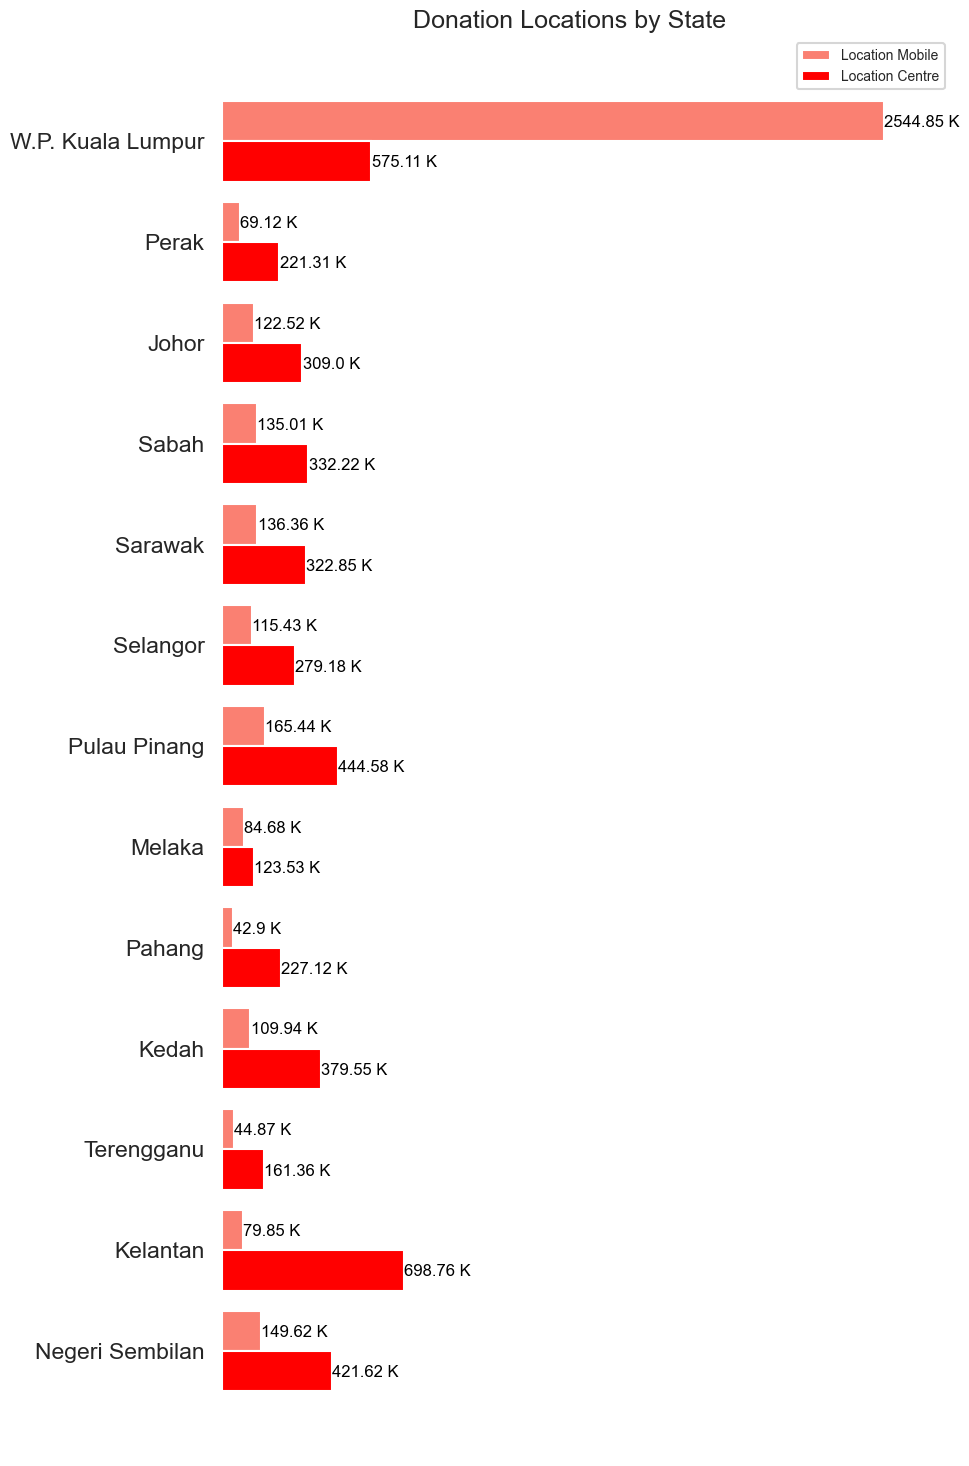

In [275]:
locations_df = donations_state_df.copy()
locations_df = locations_df.loc[locations_df['state'] != 'Malaysia']
locations_df['date'] = pd.to_datetime(locations_df['date'])
state_visits_df = locations_df.pivot_table(index=locations_df['state'],values=['location_mobile','location_centre'], aggfunc='sum').reset_index()
sorted_states = state_visits_df.sort_values(by='location_mobile',ascending=True).index
sorted_states_labels = [state_visits_df['state'].iloc[l] for l in sorted_states]


y = np.arange(len(sorted_states))
width = 0.4

first_bar = state_visits_df['location_mobile']
second_bar = state_visits_df['location_centre']

first_bar_label = 'Location Mobile'
second_bar_label = 'Location Centre'

first_bar_color = 'salmon'
second_bar_color = 'red'

state_visits_df = state_visits_df.sort_values(by='location_mobile', ascending=True)  
plt.figure(figsize=(10, 15))
sns.set_style('white')
sns.set_context('talk')
plt.box(False)

plt.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
plt.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)

for i, v in enumerate(first_bar):
    plt.text(v + 1000, i + width/2, f"{str(round(v/1000,2))} K", color='black', va='center_baseline',fontsize = 12)
    
for i, v in enumerate(second_bar):
    plt.text(v + 1000, i - width/2, f"{str(round(v/1000,2))} K", color='black', va='center_baseline',fontsize = 12)

plt.title('Donation Locations by State')
plt.yticks(y, sorted_states_labels)
plt.xticks([])
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), prop={'size': 10})

plt.show()


## Get Daily Data

In [49]:
donations_state_df

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,donations_new,donations_regular,donations_irregular
0,2006-01-01,Malaysia,525,152,139,194,40,308,217,243,277,5
1,2006-01-02,Malaysia,227,53,43,112,19,162,65,83,143,1
2,2006-01-03,Malaysia,112,29,21,56,6,112,0,8,101,3
3,2006-01-04,Malaysia,391,92,98,165,36,145,246,286,102,3
4,2006-01-05,Malaysia,582,149,198,193,42,371,211,328,250,4
...,...,...,...,...,...,...,...,...,...,...,...,...
92381,2024-01-21,W.P. Kuala Lumpur,871,209,233,377,52,206,665,132,547,192
92382,2024-01-22,W.P. Kuala Lumpur,180,50,43,78,9,82,98,19,143,18
92383,2024-01-23,W.P. Kuala Lumpur,427,101,119,198,9,91,336,84,265,78
92384,2024-01-24,W.P. Kuala Lumpur,306,79,87,133,7,85,221,42,202,62


In [50]:
from datetime import datetime, timedelta

donations_state_df['date'] = pd.to_datetime(donations_state_df['date'])
latest_date = donations_state_df['date'].max()
start_date = latest_date - timedelta(days=2)
daily_df = donations_state_df.loc[(donations_state_df['date'] >= start_date) & (donations_state_df['date'] <= latest_date)].reset_index(drop=True)
daily_df

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,donations_new,donations_regular,donations_irregular
0,2024-01-23,Malaysia,1325,322,366,575,62,374,951,287,804,234
1,2024-01-24,Malaysia,1397,338,402,586,71,330,1067,357,728,312
2,2024-01-25,Malaysia,2946,647,914,1280,105,235,2711,628,1447,871
3,2024-01-23,Johor,143,34,36,73,0,39,104,38,82,23
4,2024-01-24,Johor,82,22,26,34,0,25,57,10,60,12
5,2024-01-25,Johor,158,43,43,66,6,0,158,52,53,53
6,2024-01-23,Kedah,86,22,25,31,8,16,70,36,43,7
7,2024-01-24,Kedah,51,10,16,23,2,0,51,5,30,16
8,2024-01-25,Kedah,44,10,14,16,4,0,44,11,26,7
9,2024-01-23,Kelantan,64,14,12,29,9,22,42,27,31,6


In [51]:
def change_number(latest, previous):
    delta = int((latest - previous) / latest * 100)
    if delta > 0:
        return f"{chr(0x1F53A)} {abs(delta)}% "  # Up arrow
    else:
        return f"{chr(0x1F53B)} {abs(delta)}%"  # Down arrow
    

In [52]:
latest_donors = int(daily_df.loc[(daily_df['date'] == latest_date) & (daily_df['state'] == 'Malaysia'), 'daily'].values[0])
previous_donors = int(daily_df.loc[(daily_df['date'] == latest_date - timedelta(days=2)) & (daily_df['state'] == 'Malaysia'), 'daily'].values[0])

new_latest_donors = int(daily_df.loc[(daily_df['date'] == latest_date) & (daily_df['state'] == 'Malaysia'), 'donations_new'].values[0])
new_previous_donors = int(daily_df.loc[(daily_df['date'] == latest_date - timedelta(days=2)) & (daily_df['state'] == 'Malaysia'), 'donations_new'].values[0])

regular_latest_donors = int(daily_df.loc[(daily_df['date'] == latest_date) & (daily_df['state'] == 'Malaysia'), 'donations_regular'].values[0])
regular_previous_donors = int(daily_df.loc[(daily_df['date'] == latest_date - timedelta(days=2)) & (daily_df['state'] == 'Malaysia'), 'donations_regular'].values[0])

others_latest_donors = int(daily_df.loc[(daily_df['date'] == latest_date) & (daily_df['state'] == 'Malaysia'), 'donations_irregular'].values[0])
others_previous_donors = int(daily_df.loc[(daily_df['date'] == latest_date - timedelta(days=2)) & (daily_df['state'] == 'Malaysia'), 'donations_irregular'].values[0])

latest_blood_a = int(daily_df.loc[(daily_df['date'] == latest_date) & (daily_df['state'] == 'Malaysia'), 'blood_a'].values[0])
previous_blood_a = int(daily_df.loc[(daily_df['date'] == latest_date - timedelta(days=2)) & (daily_df['state'] == 'Malaysia'), 'blood_a'].values[0])

latest_blood_b = int(daily_df.loc[(daily_df['date'] == latest_date) & (daily_df['state'] == 'Malaysia'), 'blood_b'].values[0])
previous_blood_b = int(daily_df.loc[(daily_df['date'] == latest_date - timedelta(days=2)) & (daily_df['state'] == 'Malaysia'), 'blood_b'].values[0])

latest_blood_ab = int(daily_df.loc[(daily_df['date'] == latest_date) & (daily_df['state'] == 'Malaysia'), 'blood_ab'].values[0])
previous_blood_ab = int(daily_df.loc[(daily_df['date'] == latest_date - timedelta(days=2)) & (daily_df['state'] == 'Malaysia'), 'blood_ab'].values[0])

latest_blood_o = int(daily_df.loc[(daily_df['date'] == latest_date) & (daily_df['state'] == 'Malaysia'), 'blood_o'].values[0])
previous_blood_o = int(daily_df.loc[(daily_df['date'] == latest_date - timedelta(days=2)) & (daily_df['state'] == 'Malaysia'), 'blood_o'].values[0])

message = f'''
= Latest Update as of {daily_df['date'].loc[daily_df['date'] == latest_date].drop_duplicates().values[0].astype('datetime64[D]')} =

Total Donors  : {latest_donors} ({change_number(latest_donors,previous_donors)}) 
    - New     : {new_latest_donors} ({change_number(new_latest_donors,new_previous_donors)}) 
    - Regular : {regular_latest_donors} ({change_number(regular_latest_donors,regular_previous_donors)})
    - Others  : {others_latest_donors} ({change_number(others_latest_donors,others_previous_donors)})

Blood Types Statistics
    - Type A  : {latest_blood_a} ({change_number(latest_blood_a,previous_blood_a)})
    - Type B  : {latest_blood_b} ({change_number(latest_blood_b,previous_blood_b)})
    - Type AB : {latest_blood_ab} ({change_number(latest_blood_ab,previous_blood_ab)})
    - Type O  : {latest_blood_o} ({change_number(latest_blood_o,previous_blood_o)})
    
Data is acquired from KKM daily at 0900 hrs and at 2200 hrs\nA comparison of 3 days can be seen by the side
'''

print(message)

with open('./daily_texts/daily_message.txt','w',encoding='utf-8') as f:
    f.write(message)



= Latest Update as of 2024-01-25 =

Total Donors  : 2946 (🔺 55% ) 
    - New     : 628 (🔺 54% ) 
    - Regular : 1447 (🔺 44% )
    - Others  : 871 (🔺 73% )

Blood Types Statistics
    - Type A  : 647 (🔺 50% )
    - Type B  : 914 (🔺 59% )
    - Type AB : 105 (🔺 40% )
    - Type O  : 1280 (🔺 55% )
    
Data is acquired from KKM daily at 0900 hrs and at 2200 hrs
A comparison of 3 days can be seen by the side



## New Donors Trend

In [53]:
df_dict['newdonors_state_df'].keys()

Index(['date', 'state', '17-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '50-54', '55-59', '60-64', 'other', 'total'],
      dtype='object')

In [79]:
new_donors_df = df_dict['newdonors_state_df'].copy()
malaysia_new_donors_df = new_donors_df.loc[new_donors_df['state'] == 'Malaysia']
malaysia_new_donors_df

,date,state,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Malaysia,124,31,31,18,24,7,5,2,1,0,243
1,2006-01-02,Malaysia,16,15,11,8,19,6,6,2,0,0,83
2,2006-01-03,Malaysia,1,2,1,2,1,0,0,1,0,0,8
3,2006-01-04,Malaysia,171,35,27,13,16,16,6,1,0,1,286
4,2006-01-05,Malaysia,219,41,22,13,16,8,8,1,0,0,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6594,2024-01-21,Malaysia,104,60,56,65,51,33,25,10,5,0,409
6595,2024-01-22,Malaysia,60,19,12,14,12,10,3,2,0,0,132
6596,2024-01-23,Malaysia,120,46,37,33,28,14,4,5,0,0,287
6597,2024-01-24,Malaysia,117,78,50,48,23,22,11,8,0,0,357


In [73]:
malaysia_new_donors_df['date'] = pd.to_datetime(malaysia_new_donors_df['date'])
malaysia_new_donors_count= malaysia_new_donors_df.groupby(malaysia_new_donors_df['date'].dt.year)['total'].sum().reset_index()
malaysia_new_donors_count.columns = ['year', 'count']
print(malaysia_new_donors_count)

   year    count
0  1970  2771128


C:\Users\alifa\AppData\Local\Temp\ipykernel_16028\3634041539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malaysia_new_donors_df['date'] = pd.to_datetime(malaysia_new_donors_df['date'])


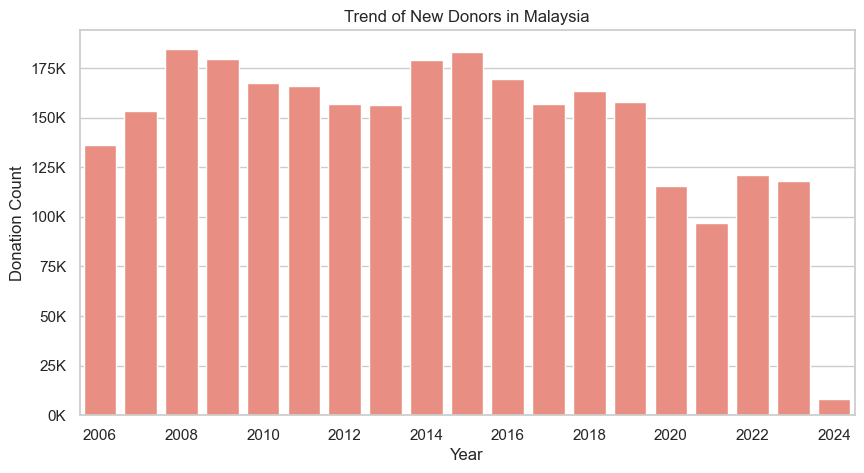

In [57]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

sns.barplot(data=malaysia_new_donors_count, x='year', y='count', color='salmon')

formatter = ticker.FuncFormatter(lambda x,pos:f"{int(x/1000)}K")
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.ylabel('Donation Count')
plt.xlabel('Year')
plt.title("Trend of New Donors in Malaysia")
plt.show()

In [83]:
new_donors_df = df_dict['newdonors_state_df'].copy()
malaysia_new_donors_df = new_donors_df.loc[new_donors_df['state'] == 'Malaysia']
malaysia_new_donors_df['date'] = pd.to_datetime(malaysia_new_donors_df['date']).dt.year
malaysia_new_donors_age = malaysia_new_donors_df.groupby(malaysia_new_donors_df['date'])[['17-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64']].sum().reset_index()
malaysia_new_donors_age.columns = ['year', '17-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64']
malaysia_new_donors_age


C:\Users\alifa\AppData\Local\Temp\ipykernel_16028\3755388137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malaysia_new_donors_df['date'] = pd.to_datetime(malaysia_new_donors_df['date']).dt.year


,year,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64
0,2006,67146,22243,14879,11926,9241,6368,3278,1126,73
1,2007,72352,25466,17340,14080,10785,7516,4007,1456,135
2,2008,89390,29148,20548,16752,12810,9063,4895,1809,151
3,2009,86569,29741,20438,15799,11946,8505,4546,1680,137
4,2010,83347,26884,19116,14399,10748,7310,3870,1447,155
5,2011,86886,25736,17512,13168,9976,6807,3945,1557,118
6,2012,80786,23725,17320,12632,9642,6597,4044,1612,144
7,2013,80088,23788,17667,12969,9540,6506,3991,1623,134
8,2014,87482,26015,21174,16370,12095,8305,5070,2143,220
9,2015,89418,26716,22123,16795,12062,8442,5020,2223,221


Text(0.5, 1.0, 'Trend of New DonorsAge Group throughout the years')

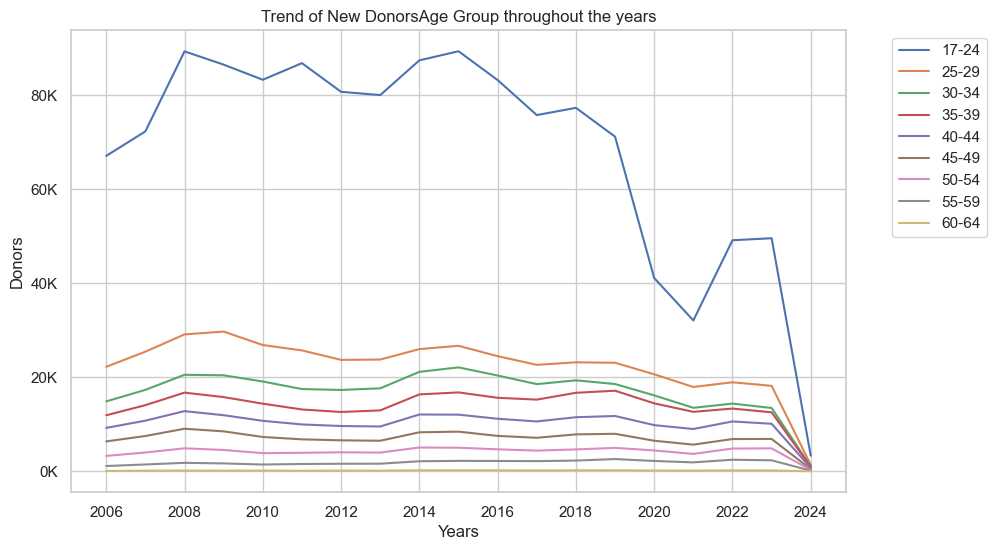

In [90]:
malaysia_new_donors_age.plot(x='year',kind='line',figsize=(10,6))

formatter = ticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}K")

plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator())

plt.xlabel('Years')
plt.ylabel('Donors')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.title(f'Trend of New DonorsAge Group throughout the years')





